***Note - Whole file can be runned at once, so request to run the whole all in once.***

# **Project - Credit Card Approval**

## <font color="Red">**Section: Data analysis approach**</font> 


### Data Analysis Approach:

#### 1. **EDA (Exploratory Data Analysis):**
   - **Univariate Analysis:**
     - **Gender, Car Owner, Property Owner, and Credit Card Approval:**
       - Explored the distribution of gender, car ownership, property ownership, and credit card approval using pie charts.
       - Identified the percentage share of each category in these columns.
     - **Education and Children:**
       - Analyzed the distribution of education levels and the number of children using bar charts.
       - Provided insights into the education levels and the presence of children in credit card applications.
     - **Income Type and Housing Type:**
       - Examined the distribution of income types and housing types using bar charts.
       - Highlighted the proportions of different income and housing categories.
     - **Age and Employment Year Relationship:**
       - Investigated the relationship between age and employment year using a line plot.
       - Calculated statistics related to age and employment year groups.

   - **Bivariate Analysis:**
     - **Gender, Age, and Car Ownership:**
       - Utilized boxplots to show the relationship between gender, age, and car ownership.
       - Identified age ranges where car ownership is prevalent for different genders.
     - **Gender, Annual Income, and Property Ownership:**
       - Visualized the distribution of annual income based on gender and property ownership using violin plots.
     - **Age vs. Annual Income Scatter Plot:**
       - Explored the scatter plot of age vs. annual income, colored by gender.
       - Investigated the general trend and patterns in the relationship between age and income.
     - **Children, Age, and Gender:**
       - Plotted a violin plot to analyze the relationship between the number of children, age, and gender.

#### 2. **Feature Engineering Techniques:**
   - **Renaming Columns:**
     - Renamed columns for better readability and usage in further analysis.
   - **Conversion of Object Type Columns:**
     - Utilized label encoding and one-hot encoding for converting object-type columns to numerical format.
     - Applied ordinal encoding for certain columns like 'Type_Occupation', 'Car_Owner', 'Property_Owner', 'Housing_type', 'EDUCATION', and 'Type_Income'.
     - Used one-hot encoding for nominal columns like 'GENDER' and 'Marital_status'.
   - **Imputation:**
     - Employed KNN imputation to fill null values in 'Age' and 'Annual_income' columns.
     - Imputed missing values in 'Type_Occupation' based on the type of income.
     - Filled missing values in 'GENDER' with the mode value.
   - **Exploratory Data Visualization:**
     - Visualized the distribution of various categorical and numerical features.
     - Used pie charts, bar charts, line plots, boxplots, violin plots, and scatter plots to analyze relationships and patterns.
     - Calculated mean and median values for numeric columns and represented them in histograms.

### Justification of Data Analysis Approach:

1. **Visualization Techniques:**
   - Utilized a variety of visualization techniques to explore both univariate and bivariate relationships in the data.
   - Visualization methods such as pie charts, bar charts, boxplots, violin plots, and scatter plots provide a comprehensive understanding of the data distribution and relationships.

2. **Feature Engineering:**
   - Renamed columns to enhance clarity and ease of use.
   - Employed appropriate encoding techniques for converting object-type columns to numerical format.
   - Handled null values using KNN imputation and strategic imputation based on relevant columns.

3. **Insight Generation:**
   - Extracted meaningful insights from the distribution of gender, car ownership, property ownership, education, income types, housing types, and their relationships.
   - Investigated the impact of age on employment year and explored patterns related to gender, car ownership, and property ownership.

4. **Statistical Analysis:**
   - Calculated statistics such as mean, median, minimum, maximum, and counts for numeric columns, aiding in understanding central tendencies and variations.

5. **Relationship Exploration:**
   - Explored relationships between various features, providing a basis for understanding potential correlations and dependencies.

6. **Data Quality Checks:**
   - Checked and handled duplicates and missing values to ensure data quality.
   - Ensured that the dataset is suitable for further analysis and modeling.


## <font color="Red">**Section: Machine learning approach**</font>

### 1. Method for Machine Learning Predictions for Credit Card Approval:

The provided code implements the following machine learning models for predicting credit card approval:

- **RandomForest Classifier**
- **XGBoost**
- **Logistic Regression**
- **Support Vector Machines (SVM)**
- **Decision Tree Classifier**

### 2. Justification for RandomForest Classifier:

The RandomForest Classifier is chosen as the primary model for credit card approval predictions for the following reasons:

- **Ensemble Learning:** RandomForest is an ensemble learning method that builds multiple decision trees and merges them together. This helps reduce overfitting and improves the model's generalization.
  
- **Feature Importance:** The model considers feature importance, providing insights into which features contribute the most to the predictions. This is crucial for understanding the factors influencing credit card approval.

- **Handling Non-Linearity:** RandomForest can capture non-linear relationships between features and the target variable, which is valuable when dealing with complex patterns in credit card approval.

### 3. Steps to Improve Model Accuracy:

Several steps are taken to enhance the accuracy of the RandomForest model:

- **Feature Selection:** The top 10 important features are selected to focus on the most relevant information for prediction.

- **Standardization:** MinMaxScaler is applied to standardize the selected features, ensuring all features contribute equally to the model.

- **Cross-Validation:** Cross-validation is performed to assess the model's performance on different subsets of the data, reducing the risk of overfitting.

### 4. Model Comparison:

Four different machine learning models are compared based on their accuracy scores:

- **RandomForest Classifier**
- **XGBoost**
- **Logistic Regression**
- **Support Vector Machines (SVM)**
- **Decision Tree Classifier**

### 5. Model Accuracy Comparison:

A bar graph is plotted to visualize the accuracy comparison of different models. The accuracy scores are as follows:

- **Decision Tree: 87.74%**
- **Support Vector Machine: 90.32%**
- **Logistic Regression: 90.32%**
- **XGBoost: 92.58%**
- **Random Forest: 95.16%**

### Insights:

- The RandomForest model outperforms other models in terms of accuracy, making it the preferred choice for credit card approval predictions.
- Cross-validation helps evaluate the model's generalization performance and identify potential issues such as overfitting.


In [670]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn import tree

## <font color="Red">**A. Overview of Dataset**</font> 



### **1. Loading dataset**


In [671]:
# Load the dataset
cd = pd.read_csv('/kaggle/input/credit-card-approval-system-datasets/Credit_card.csv')             #Dataset I
cl = pd.read_csv('/kaggle/input/credit-card-approval-system-datasets/Credit_card_label.csv')       #Dataset II

In [672]:
# Information of Dataset I 
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [673]:
# Information of Dataset I 
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


### **2. Merging 2 diff table**


The `Credit_card_merged` DataFrame represents a merged dataset combining information from two tables based on the common column 'Ind_ID'. This merged dataset contains details about credit card applicants (cd) and their corresponding credit limits (cl). Each row corresponds to a unique individual with their associated credit card and credit limit information.

In [674]:
# Considering 'Ind_ID' being the common column between the two tables
Credit_card_merged = pd.merge(cd, cl, left_on='Ind_ID', right_on='Ind_ID')

print(Credit_card_merged.head())

    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0        

### **3. Saving merged dataset**


In [675]:
Credit_card_merged.to_csv("1.Credit_card_merged.csv", index = False)

### **4. Operations on Merged dataset**


In [676]:
df = pd.read_csv("1.Credit_card_merged.csv")

In [677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [678]:
df.head(3)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1

In [679]:
# Checking for null values into the dataset.
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [680]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

#### **4.1. Converting "Employees_days" to "Employees_year"** 

The column named Employees_days is the column with negative values and is something which can't be used directly hence we change that to year.

Counting 'Employed days' value counts below 0 or in -ve, since we have major values in Employed Days in -ve which dates backward, and explains about employed days till date.

In [681]:
df[df['Employed_days'] < 0].value_counts()

Ind_ID   GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income           EDUCATION                      Marital_status        Housing_type       Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  Type_Occupation  Family_Members  label
5008865  F       Y          Y              2         135000.0       Working               Secondary / secondary special  Married               House / apartment  -15761.0        -3173          1             0           0      0         Laborers         4               0        1
5088687  M       N          Y              1         135000.0       Working               Secondary / secondary special  Married               House / apartment  -18719.0        -1473          1             1           1      0         Laborers         3               0        1
5105291  F       N          N              0         112500.0       Working               Secondary / secondary special  Widow                 With parents       -10

##### **Converting -ve values to +ve ones**

In [682]:
# Finding negative values in 'Employed_days' column
negative_values_mask = df['Employed_days'] < 0

# Converting negative values to positive
df.loc[negative_values_mask, 'Employed_days'] *= -1


In [683]:
# Confirming the above code.
df[df['Employed_days'] < 0].value_counts()

Series([], Name: count, dtype: int64)

In [684]:
# Conversion to +ve value Confirmed
df['Employed_days'].sample(3)

555      124
879      339
1227    1678
Name: Employed_days, dtype: int64

##### **Converting days to year**

In [685]:
# Calculating employment duration from Employed_days and rounding it.
df['Employment_Year'] = round(df['Employed_days'] / 365, 0)

# Removing the original Employed_days column.
df = df.drop('Employed_days', axis=1)

# Inserting 'Employment_Duration' column at the 12th position
df.insert(11, 'Employment_Year', df.pop('Employment_Year'))

In [686]:
print(df['Employment_Year'].sample(3))

1480    4.0
942     4.0
1215    9.0
Name: Employment_Year, dtype: float64


#### **4.2. Converting "Birthday_count" to "Age"** 

##### **Converting -ve values to +ve ones**

In [687]:
df.head(3)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employment_Year  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0           1001.0             1           0      0         0   
1        -13557.0              2.0             1           1      1         0   
2             NaN              2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1

In [688]:
# Finding negative values in 'Employed_days' column
negative_values_mask = df['Birthday_count'] < 0

# Converting negative values to positive
df.loc[negative_values_mask, 'Birthday_count'] *= -1


In [689]:
# Confirming the above code.
df[df['Birthday_count'] < 0].value_counts()

Series([], Name: count, dtype: int64)

In [690]:
df['Birthday_count'].sample(3)

1186    19598.0
1250    14636.0
543     21671.0
Name: Birthday_count, dtype: float64

##### **Converting birth days to Age**

In [691]:
# Calculating age from Birthday_count and round
df['Age'] = round(df['Birthday_count']/365, 0)

In [692]:
# Removing the original Birthday_count column
df = df.drop('Birthday_count', axis=1)

In [693]:
# Inserting 'Age' column at the 11th position
df.insert(10, 'Age', df.pop('Age'))

In [694]:
df['Age'].sample(3)

503      NaN
1441    34.0
1306    59.0
Name: Age, dtype: float64

**Saving new dataset**

In [695]:
df.to_csv("2.Credit_card_changed_Bday&empyear.csv", index = False)

## <font color="darkblue">***1 - New Dataset - Savepoint 1***</font> 

## <font color="red">**B. Treating Outliers in "Employement_in_years" column**</font> 


### **1. Outliers Overview**

In [696]:
df1 = pd.read_csv("2.Credit_card_changed_Bday&empyear.csv")     # Reading dataset

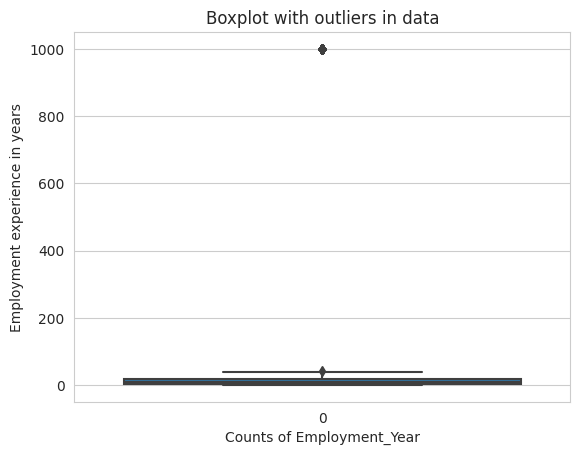

In [697]:
sns.boxplot(df['Employment_Year'])          # Using seaborn library for plotting boxplot
plt.xlabel("Counts of Employment_Year")     # applying x label
plt.ylabel("Employment experience in years")    # applying y label
plt.title("Boxplot with outliers in data")  # applying title
plt.show()

Insights:

    The above boxplot explains that there outliers at 1000, and major lies below 60

In [698]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employment_Year  1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [699]:
df1.sample(4)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1019  5021730      F         Y             Y         1       180000.0   
458   5091374      M         Y             Y         0       247500.0   
595   5117248      F         N             Y         2       112500.0   
1362  5038723      M         Y             Y         1       270000.0   

               Type_Income                      EDUCATION Marital_status  \
1019  Commercial associate  Secondary / secondary special        Married   
458                Working  Secondary / secondary special        Married   
595                Working  Secondary / secondary special        Married   
1362             Pensioner  Secondary / secondary special        Married   

           Housing_type   Age  Employment_Year  Mobile_phone  Work_Phone  \
1019  House / apartment  46.0              4.0             1           0   
458   House / apartment  42.0              3.0             1           1   
595   House / apartment  36.0              7.0             1           0   
1362  House / apartment  42.0           1001.0             1           0   

      Phone  EMAIL_ID Type_Occupation  Family_Members  label  
1019      0         1  Cleaning staff               3      0  
458       1         0         Drivers               2      0  
595       0         0        Laborers               4      0  
1362      0         0             NaN               3      0

In [700]:
df1.isnull().sum()      # Counting null values 

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employment_Year      0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

### **1.1 Inter Quartile Range - Detecting & treating Outliers**


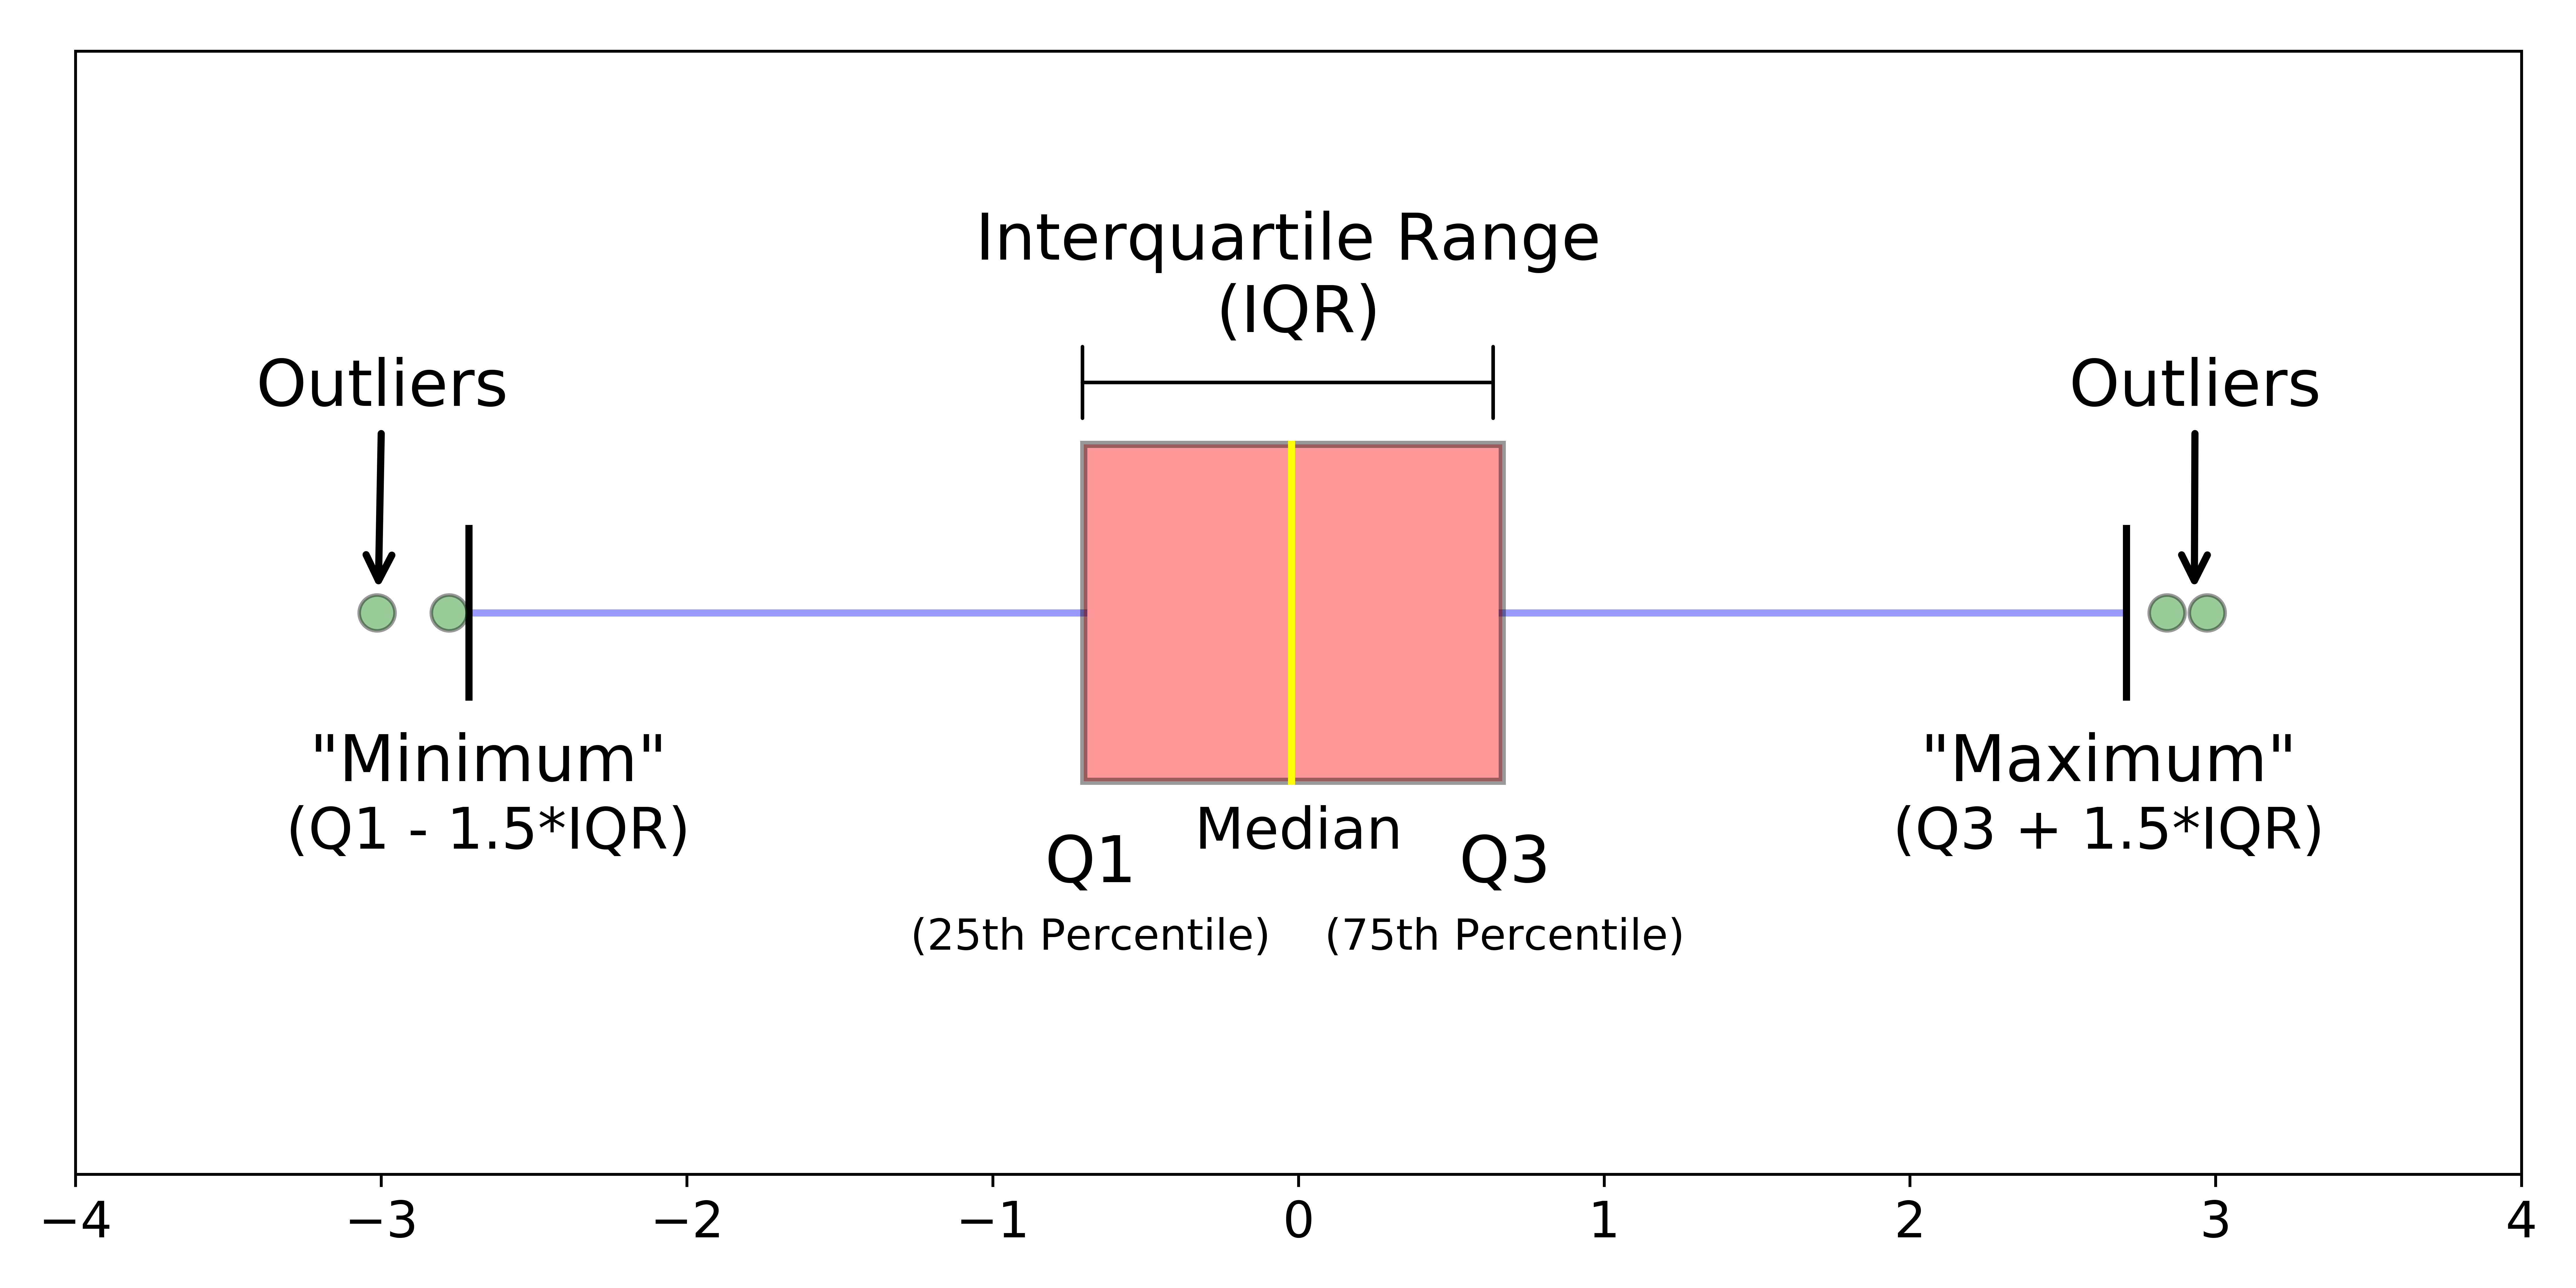

In [701]:
df1.describe()["Employment_Year"]

count    1548.000000
mean      174.844315
std       372.211315
min         0.000000
25%         3.000000
50%         7.000000
75%        17.000000
max      1001.000000
Name: Employment_Year, dtype: float64

`df1.describe()["Employment_Year"]` generates summary statistics for the 'Employment_Year' column in the DataFrame df1. The statistics include count, mean, standard deviation, minimum, 25th percentile (Q1), 50th percentile (median), 75th percentile (Q3), and maximum values.

The 25th percentile (Q1) represents the value below which 25% of the data falls. It indicates the first quartile of the data distribution.

The 75th percentile (Q3) represents the value below which 75% of the data falls. It indicates the third quartile of the data distribution.

These percentiles, along with the median (50th percentile), provide insights into the spread and distribution of the 'Employment_Year' data.

In [702]:
Q1 = df1.describe()["Employment_Year"]['25%']
Q3 = df1.describe()["Employment_Year"]['75%']

print("Q1 = ", Q1)
print("Q3 = ", Q3)

Q1 =  3.0
Q3 =  17.0


In [703]:
IQR = Q3-Q1

print("IQR = ", IQR)

IQR =  14.0


In [704]:
LL = Q1 - 1.5 * IQR

UL = Q3 + 1.5 * IQR

print("Lower Limit = ",LL)
print("Upper Limit = ", UL)

Lower Limit =  -18.0
Upper Limit =  38.0


#### <font color="green">**1.2 Clipping Upper_Limit vallues to Outliers in dataset**</font> 


Using function named "clip()" we here cap upper outliers with upper limit which we've obtained from using statistical method IQR, and since our lower limit values are major near 1-3 , hence we don't cap lower values with Lower_Limit from IQR. 

In [705]:
df1['Employment_Year'] = df1['Employment_Year'].clip(lower=None, upper = UL)

In [706]:
df1['Employment_Year'].value_counts(bins = 10)

(-0.039, 3.8]    424
(3.8, 7.6]       403
(34.2, 38.0]     267
(7.6, 11.4]      219
(11.4, 15.2]     103
(15.2, 19.0]      53
(19.0, 22.8]      37
(22.8, 26.6]      21
(26.6, 30.4]      11
(30.4, 34.2]      10
Name: count, dtype: int64

In [707]:
# Verifying that above mentioned (-0.039) values is not present in dataset, and there are no values below 0 in dataset.
df1[df1['Employment_Year'] == -0.039]

Empty DataFrame
Columns: [Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Age, Employment_Year, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members, label]
Index: []

In [708]:
df1['Employment_Year'].unique()

array([38.,  2.,  3.,  1.,  7.,  5., 12.,  9., 13., 10.,  4., 20.,  6.,
       11.,  0., 23.,  8., 14., 19., 22., 21., 17., 26., 24., 15., 16.,
       34., 37., 27., 35., 18., 31., 32., 25., 29., 33., 28., 36.])

Text(0.5, 1.0, 'Outliers without Capping')

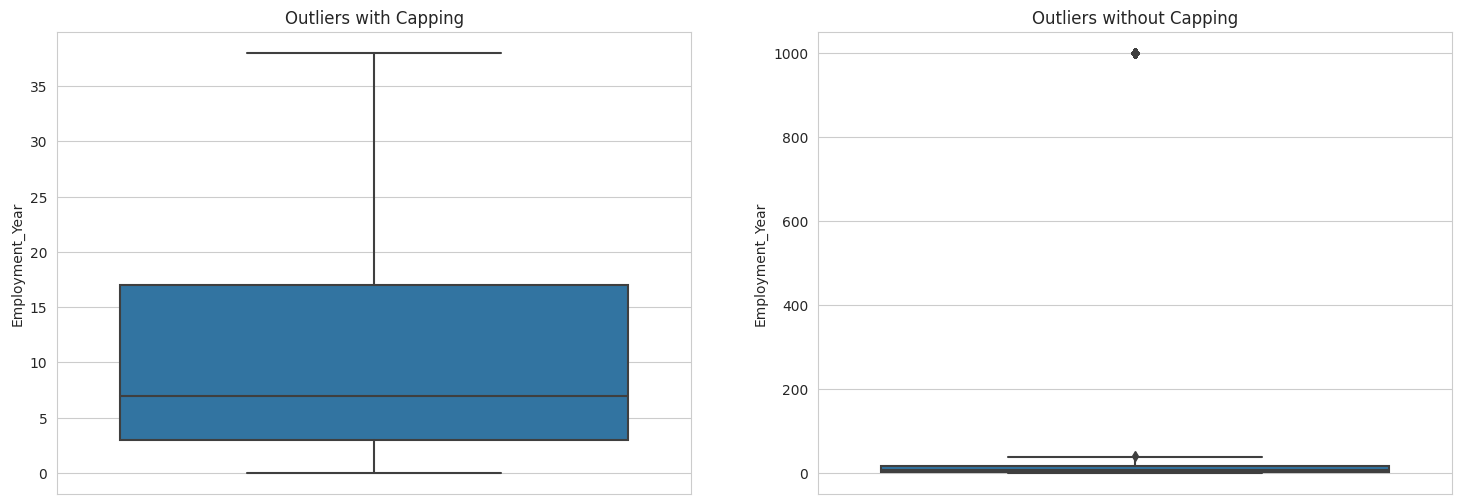

In [709]:
plt.figure(figsize=(18,6))

# Plot for MICE vs Without MICE
plt.subplot(1,2,1)
sns.boxplot(data = df1, y = 'Employment_Year')
plt.title("Outliers with Capping")

plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'Employment_Year')
plt.title("Outliers without Capping")

From above code we can clearly see that maximum upper_limit for the dataset is 1001 , which is technically incorrect, and its not possible to have an experience of 1001 years, since maximum life of an human as per current data is around 89, since those are the real outliers (Type_occupation is also missing for same individuals) which can't be predicted with help of KNN and MICE, hence we cap those values with UPPER_LIMIT of 38.

In [710]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employment_Year  1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

From above analysis we conclude that the individuals with "Employement_in_years" having "1001" of exp could be an error taken place during entry of data, further it is observed that major of the these individual are above 52 years of age and also having Type_occupation missing, which further makes it easy to drop them out of dataset, as missing "Type_occupation" can't be imputed with using "mode" into that column as Type_occupation could be very different for individual and can't be guessed easily, further to use 'MICE Imputer' we need an similar range of data for predicting the values for those individual, but since all of those values for those individuals are "1001", hence there's no room for MICE Imputation as well, hence we capped UPPERLIMIT to all those (1001) values and will be creating another category in "Type_occupation" for "pensioners" as "others" or "pensioners" 

In [711]:
df1.to_csv("3.Credit_card_Capped(1001).csv", index = False)

## <font color="darkblue">***2 - New Dataset - Savepoint 2***</font> 

## <font color="red">**C. Data Cleaning & Imputation**</font> 


### **1. KNN-Imputation for null values in ['Age', 'Annual_Income'] columns, general imputation for "Type_occupation", and mode imputation for "gender"**


In [712]:
df2 = pd.read_csv("3.Credit_card_Capped(1001).csv")

In [713]:
df2.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

    Age  Employment_Year  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0  51.0             38.0             1           0      0         0   
1  37.0              2.0             1           1      1         0   
2   NaN              2.0             1           1      1         0   
3  37.0              2.0             1           1      1         0   
4  37.0              2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [714]:
df2.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employment_Year      0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

#### **1.1 KNN Imputation for "Age" and "Annual_income" columns**

In [715]:
# Importing KNNImputer from sklearn library
from sklearn.impute import KNNImputer   

columns_to_impute = ['Annual_income','Age']

# Creating a KNN imputer
knn_imputer = KNNImputer(n_neighbors=3)  

# Applying KNN imputation to the columns
df2[columns_to_impute] = knn_imputer.fit_transform(df2[columns_to_impute])

This code utilizes the `KNNImputer` class from the `sklearn.impute` module to impute missing values in specified columns ('Annual_income' and 'Age') using the K-Nearest Neighbors algorithm with `n_neighbors` set to 3. It fits the imputer to the data (`df2`) and transforms the specified columns, replacing missing values with values inferred from neighboring data points.

In [716]:
# Verifying the above code
df2.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                  0
Employment_Year      0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [717]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1548 non-null   float64
 11  Employment_Year  1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [718]:
df2['Age'] = df2['Age'].astype('int64') #Converting 'Age' column to "int" type

In [719]:
df2['Annual_income'] = df2['Annual_income'].astype('int64')      #Converting 'Annual_income' column to "int" type

In [720]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   int64  
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1548 non-null   int64  
 11  Employment_Year  1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

##### **1.1.1 Filling null values in Type_occupation column with ***"Unknown"*** for non-pensioners and ***"pensioner"*** for pensioners**

In this case we could have deleted thode columns but while going through data set I found that Type_occupations column has null values majorly for Pendioners from Type_income and some random ones, so instead of removing those I filled those "pensioners" with "pensioners" and others with as "unknown" category.   

In [721]:
df2['Type_Occupation'].isnull().value_counts()

Type_Occupation
False    1060
True      488
Name: count, dtype: int64

In [722]:
# from sklearn.preprocessing import OrdinalEncoder
# rank = ['Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
#        'Accountants', 'High skill tech staff', 'Managers',
#        'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
#        'Waiters/barmen staff', 'Security staff', 'Medicine staff',
#        'Private service staff', 'HR staff', 'Secretaries',
#        'Realty agents']
# oe = OrdinalEncoder(categories=[rank])
# df3['Type_Occupation'] = oe.fit_transform(df3[['Type_Occupation']])
# df3.head()

Since there are nan values present as per above columns we'll impute those values by 'unknown' and then encode them to go for MICE prediction

##### **1.1.1.1 Filling Type_occupation column with ***"Unknown"*** for non-pensioners and ***"pensioner"*** for pensioners**

In [723]:
# Fill missing values in 'Type_Occupation' column where 'Type_Income' is not 'Pensioner'
df2.loc[df2['Type_Income'] != 'Pensioner', 'Type_Occupation'] = df2.loc[df2['Type_Income'] != 'Pensioner', 'Type_Occupation'].fillna('Unknown')

In [724]:
# Fill missing values in 'Type_Occupation' column where 'Type_Income' is 'Pensioner'
df2.loc[df2['Type_Income'] == 'Pensioner', 'Type_Occupation'] = df2.loc[df2['Type_Income'] == 'Pensioner', 'Type_Occupation'].fillna('Pensioner')

In [725]:
df2['Type_Occupation'].isnull().value_counts()

Type_Occupation
False    1548
Name: count, dtype: int64

In [726]:
df2['Type_Occupation'].unique()

array(['Pensioner', 'Unknown', 'Core staff', 'Cooking staff', 'Laborers',
       'Sales staff', 'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [727]:
df2.isna().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Age                0
Employment_Year    0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

##### **1.1.2 Filling GENDER column with ***"Mode"*** values**

In [728]:
column_to_impute = 'GENDER'

# Finding the most frequent gender in the dataset
most_frequent_gender = df2[column_to_impute].mode()[0]

# Imputing missing values with the most frequent gender
df2[column_to_impute].fillna(most_frequent_gender, inplace=True)

# Checking if there are any remaining missing values
print(df2.isnull().sum())


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Age                0
Employment_Year    0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64


/tmp/ipykernel_33/2050649826.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[column_to_impute].fillna(most_frequent_gender, inplace=True)


In [729]:
# Before imputation of mean Gender in previous dataset
df1['GENDER'].value_counts()

GENDER
F    973
M    568
Name: count, dtype: int64

Form above code we can understand that "Females" are the highest number of applicants, hence we fill 7 missing values with most_frequent occuring ones, i.e "female".

In [730]:
# After imputation of mean Gender in df2 dataset
df2['GENDER'].value_counts()

GENDER
F    980
M    568
Name: count, dtype: int64

In [731]:
df2.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0         180000   
1  5009744      F         Y             N         0         315000   
2  5009746      F         Y             N         0         315000   
3  5009749      F         Y             N         0         315000   
4  5009752      F         Y             N         0         315000   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Age  Employment_Year  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0   51             38.0             1           0      0         0   
1   37              2.0             1           1      1         0   
2   37              2.0             1           1      1         0   
3   37              2.0             1           1      1         0   
4   37              2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0       Pensioner               2      1  
1         Unknown               2      1  
2         Unknown               2      1  
3         Unknown               2      1  
4         Unknown               2      1

In [732]:
df2.to_csv("4.Credit_card_clean_Data_Analysis.csv", index = False)

## <font color="darkblue">The above dataset now could be used for EDA and further data analysis</font> 

## <font color="red">**D. EDA**</font> 


In [733]:
import pandas as pd 
dv = pd.read_csv("4.Credit_card_clean_Data_Analysis.csv")

In [734]:
dv.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0         180000   
1  5009744      F         Y             N         0         315000   
2  5009746      F         Y             N         0         315000   
3  5009749      F         Y             N         0         315000   
4  5009752      F         Y             N         0         315000   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Age  Employment_Year  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0   51             38.0             1           0      0         0   
1   37              2.0             1           1      1         0   
2   37              2.0             1           1      1         0   
3   37              2.0             1           1      1         0   
4   37              2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0       Pensioner               2      1  
1         Unknown               2      1  
2         Unknown               2      1  
3         Unknown               2      1  
4         Unknown               2      1

In [735]:
# Renaming the Columns for easy usage.

# (inplace = True) helps renaming the data permanently in main file.
dv.rename(columns= {"GENDER": "Gender"}, inplace = True)   

dv.rename(columns= {"Propert_Owner": "Property_Owner"}, inplace = True)

dv.rename(columns= {"CHILDREN": "Children"}, inplace = True)

dv.rename(columns= {"EDUCATION": "Education"}, inplace = True)

dv.rename(columns= {"EMAIL_ID": "Email_ID"}, inplace = True)

In [736]:
dv.to_csv("SQL_Credit_card_clean_Data_Analysis.csv", index = False)

In [737]:
dv.head(4)

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_income  \
0  5008827      M         Y              Y         0         180000   
1  5009744      F         Y              N         0         315000   
2  5009746      F         Y              N         0         315000   
3  5009749      F         Y              N         0         315000   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   

   Age  Employment_Year  Mobile_phone  Work_Phone  Phone  Email_ID  \
0   51             38.0             1           0      0         0   
1   37              2.0             1           1      1         0   
2   37              2.0             1           1      1         0   
3   37              2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0       Pensioner               2      1  
1         Unknown               2      1  
2         Unknown               2      1  
3         Unknown               2      1

In [738]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1548 non-null   int64  
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1548 non-null   int64  
 11  Employment_Year  1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [739]:
dv.shape

(1548, 19)

In [740]:
# Checking for any duplicate rows present in data.

dv.duplicated().sum()

0

In [741]:
dv.head()

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_income  \
0  5008827      M         Y              Y         0         180000   
1  5009744      F         Y              N         0         315000   
2  5009746      F         Y              N         0         315000   
3  5009749      F         Y              N         0         315000   
4  5009752      F         Y              N         0         315000   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Age  Employment_Year  Mobile_phone  Work_Phone  Phone  Email_ID  \
0   51             38.0             1           0      0         0   
1   37              2.0             1           1      1         0   
2   37              2.0             1           1      1         0   
3   37              2.0             1           1      1         0   
4   37              2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0       Pensioner               2      1  
1         Unknown               2      1  
2         Unknown               2      1  
3         Unknown               2      1  
4         Unknown               2      1

### **Univariate Analysis**

##### **What is the percent share of Gender, Car Owner, Property Owner and How much applications are approved till date?**

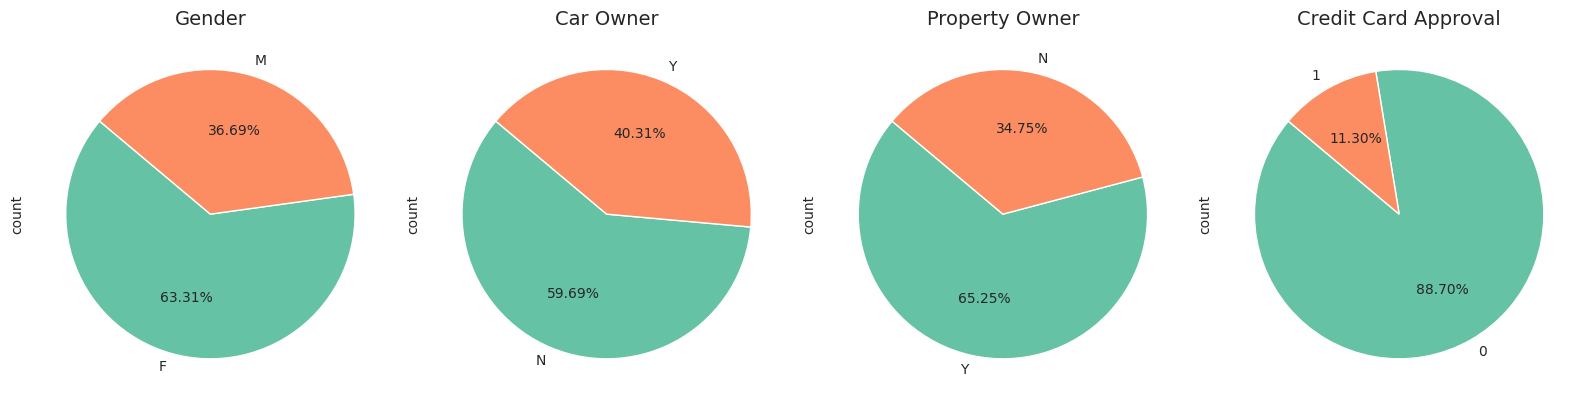

In [742]:
# Applying value_counts() separately to each column
value_counts_gender = dv['Gender'].value_counts()
value_counts_car_owner = dv['Car_Owner'].value_counts()
value_counts_property_owner = dv['Property_Owner'].value_counts()
value_counts_label = dv['label'].value_counts()

# Plotting pie chart for each column
plt.figure(figsize=(16, 10))

# Color palette for pie charts
colors = ['#66c2a5', '#fc8d62']

plt.subplot(1, 4, 1)
value_counts_gender.plot(kind='pie', autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Gender', fontsize=14)

plt.subplot(1, 4, 2)
value_counts_car_owner.plot(kind='pie', autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Car Owner', fontsize=14)

plt.subplot(1, 4, 3)
value_counts_property_owner.plot(kind='pie', autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Property Owner', fontsize=14)

plt.subplot(1, 4, 4)
value_counts_label.plot(kind='pie', autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Credit Card Approval', fontsize=14)

plt.tight_layout()
plt.show()


***Insights*** :  

**Gender**:
    - The above chart explains that there are total 63% females and 36% males applting for Credit card

**Car Owner**:
    - The above chart explains that there are total 59% of applicants who does not owns the car and 40% applicants owns the car.

**Property_owner**:
    - The above chart explains that there are total 65% of applicants who owns the property and 34% of applicants does not owns the property.

**Credit Card Approvals**:
    - The above chart explains that there are total 88% of applications who are passed and 11% of applicants got rejected for application of credit card.



In [743]:
# Below code explains median and maximum salary as per educational background in our system.
dv.groupby(['Gender', "Car_Owner", "Property_Owner"])['Ind_ID'].count()

Gender  Car_Owner  Property_Owner
F       N          N                 245
                   Y                 474
        Y          N                  82
                   Y                 179
M       N          N                  77
                   Y                 128
        Y          N                 134
                   Y                 229
Name: Ind_ID, dtype: int64

***Insights:***

The code groups the dataset by gender, car ownership status, and property ownership status. It then calculates the count of individuals (Ind_ID) in each group. This analysis provides insights into the distribution of individuals based on gender, car ownership, and property ownership.

##### **Show Unique values and their counts in Education and Children Column**

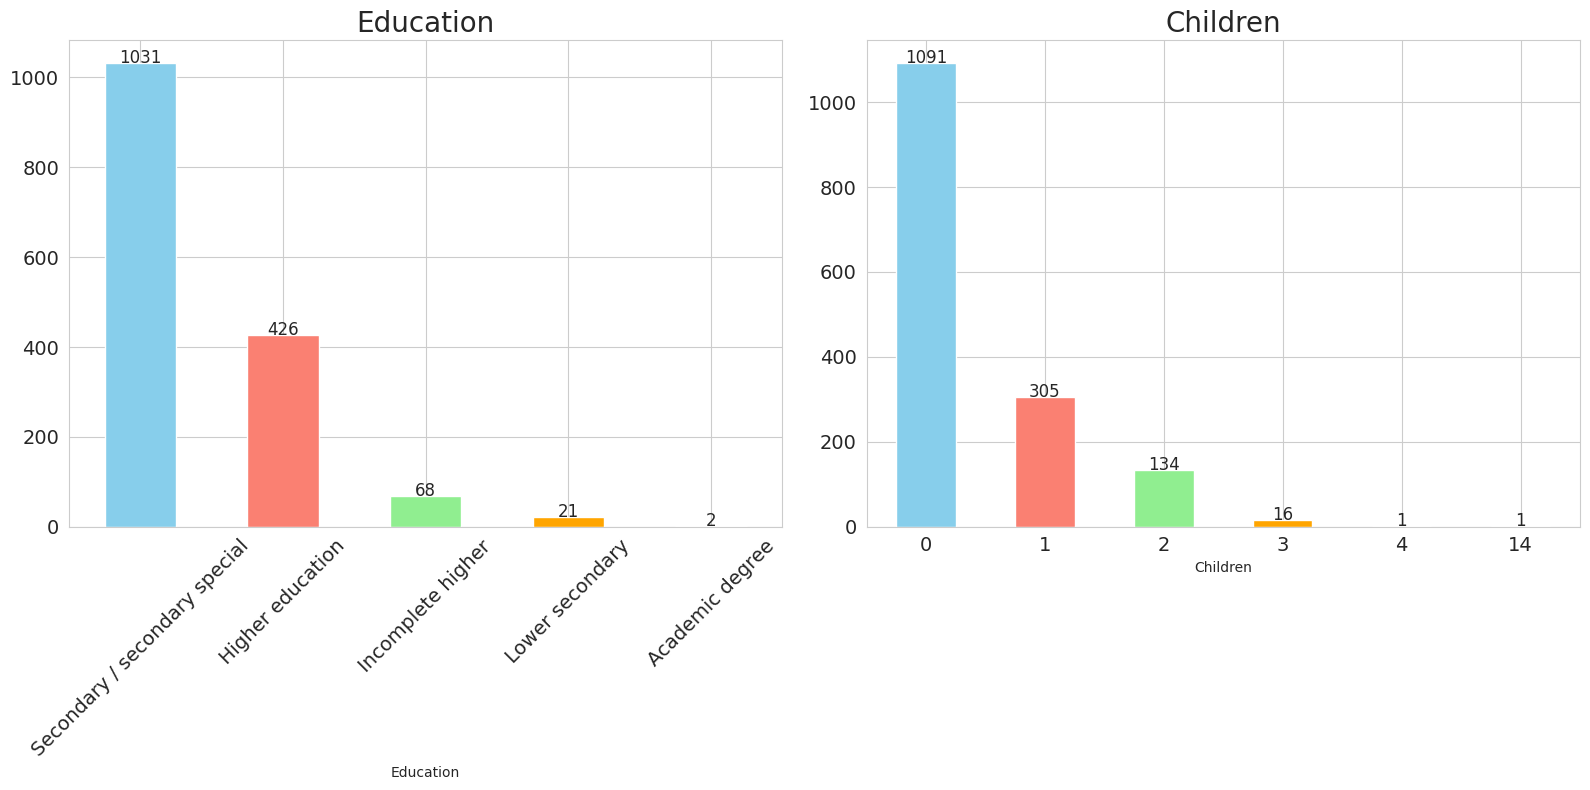

In [744]:
# Applying value_counts() separately to each column
value_counts_education = dv['Education'].value_counts()
value_counts_children = dv['Children'].value_counts()

# Plotting pie chart for each column
plt.figure(figsize=(16, 8))

# Color palette for pie charts
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

plt.subplot(1, 2, 1)
ax = value_counts_education.plot(kind='bar', color=custom_colors)
plt.title('Education', fontsize=20)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels and set font size for better readability
plt.yticks(fontsize=14)

# Add count above each bar
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center', fontsize=12)

plt.subplot(1, 2, 2)
ax = value_counts_children.plot(kind='bar', color=custom_colors)
plt.title('Children', fontsize=20)
plt.xticks(rotation=0, fontsize=14)  # Rotate x-axis labels and set font size for better readability
plt.yticks(fontsize=14)

# Add count above each bar
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


***Insights*** :  

**Education**:
    - The application for credit cards are majorly educated from Secondary academics with 1031 applicants, followed by Higher education with 426 applications and least are from Academic Degree with 2 applicants.

**Children**:
    - The major number of applicants have no childrens with counts of 1091 applications and having 1 children being the 30% of applications from previous one. 


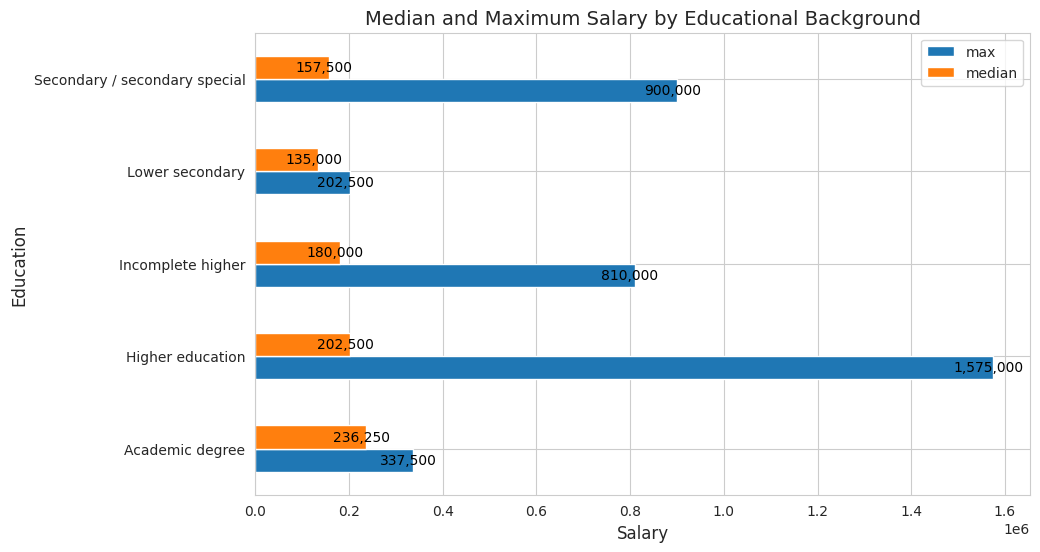

In [745]:
import matplotlib.pyplot as plt

ax = dv.groupby('Education')['Annual_income'].agg(["max", "median"]).plot(kind='barh', figsize=(10, 6))

for p in ax.patches:
    ax.annotate(f"{p.get_width():,.0f}", (p.get_width() - 10000, p.get_y() + p.get_height() / 2),
                ha='center', va='center', color='black', fontsize=10)

plt.xlabel('Salary', fontsize=12)
plt.ylabel('Education', fontsize=12)
plt.title('Median and Maximum Salary by Educational Background', fontsize=14)

plt.show()


In [746]:
# Below code explains median and maximum salary as per educational background in our system.
dv.groupby(['Education'])['Annual_income'].agg(["max", "median"])

max    median
Education                                       
Academic degree                 337500  236250.0
Higher education               1575000  202500.0
Incomplete higher               810000  180000.0
Lower secondary                 202500  135000.0
Secondary / secondary special   900000  157500.0

***Insights:***

The code groups the dataset by educational background and calculates the maximum and median annual income for each group. This helps to understand the salary distribution based on different levels of education.

##### **Show Unique values and their counts in Income Type and Type of Housing**

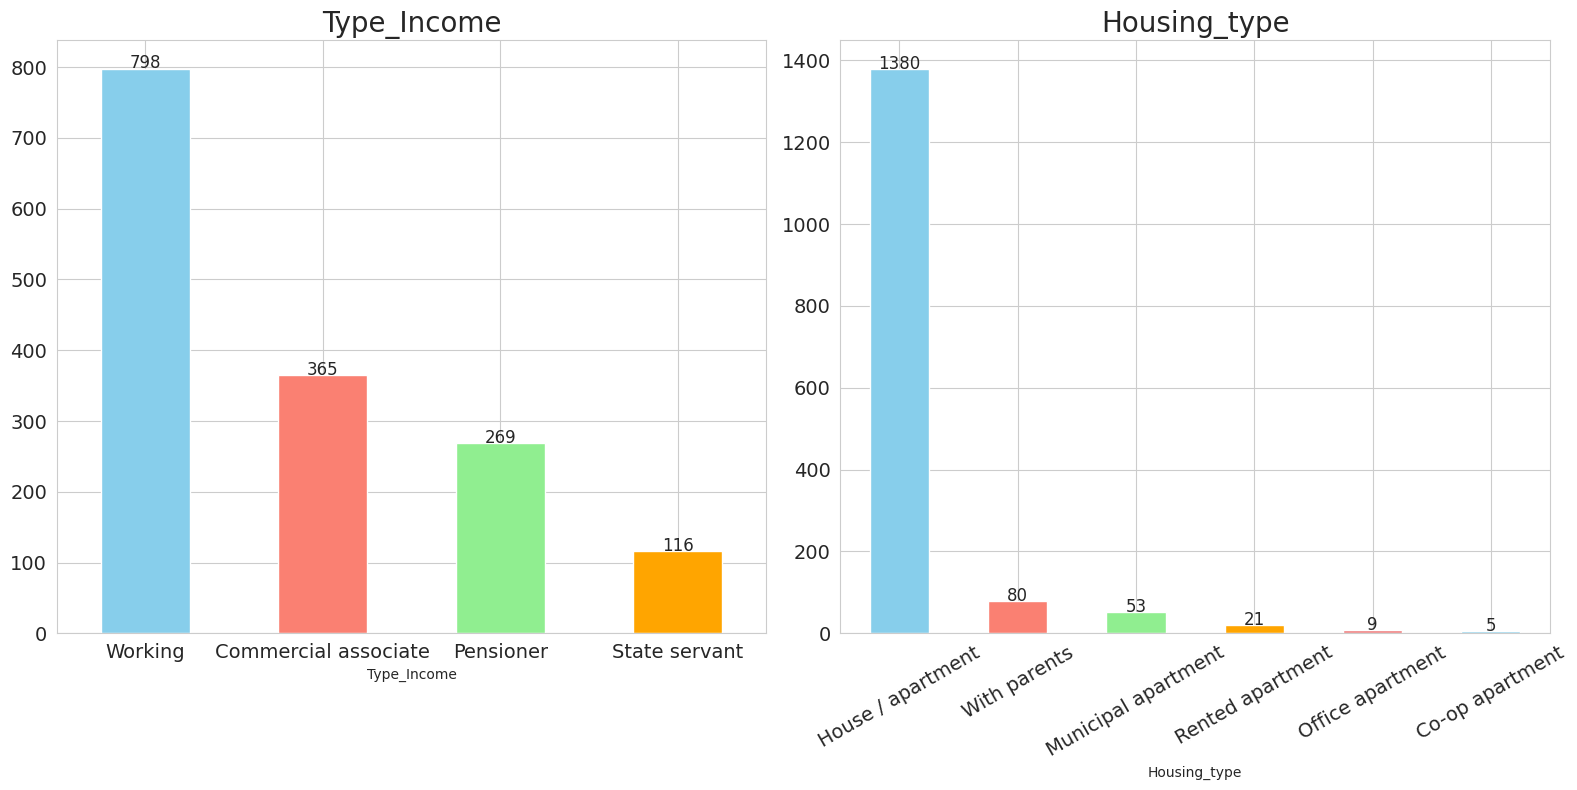

In [747]:
value_counts_income = dv['Type_Income'].value_counts()
value_counts_housing = dv['Housing_type'].value_counts()


plt.figure(figsize=(16, 8))

# Color palette for pie charts
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

plt.subplot(1, 2, 1)
ax = value_counts_income.plot(kind='bar', color = custom_colors)
plt.title('Type_Income', fontsize=20)
plt.xticks(rotation=0)  # Rotate x-axis labels by 0 degrees instead of 90 in general settings for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center', fontsize=12)

plt.subplot(1, 2, 2)
ax = value_counts_housing.plot(kind='bar', color = custom_colors)
plt.title('Housing_type', fontsize=20)
plt.xticks(rotation=30)  # Rotate x-axis labels by 0 degrees instead of 90 in general settings for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center', fontsize=12)


plt.tight_layout()
plt.show()


***Insights*** :

**Income Type**:
    - The major amount of applicants belongs to Working Class, where their average salary being the lowest in all Income groups, followed by Commercial associate, who have highest average salary and then by pensioners, where state servants being the least one.

In [748]:
dv.groupby(["Type_Income"])['Type_Income'].count()

Type_Income
Commercial associate    365
Pensioner               269
State servant           116
Working                 798
Name: Type_Income, dtype: int64

**Insights:**

The code groups the dataset by the type of income and then counts the number of applications .This analysis helps understand the distribution of application across different types of income.

<Axes: ylabel='Type_Income'>

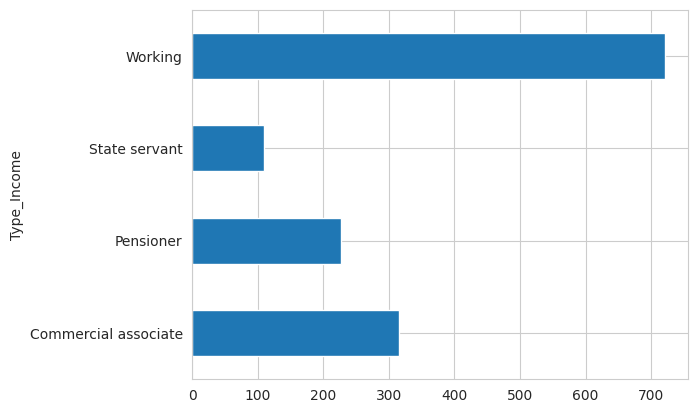

In [749]:
dv[dv['label'] == 0].groupby('Type_Income').size().plot(kind = 'barh')

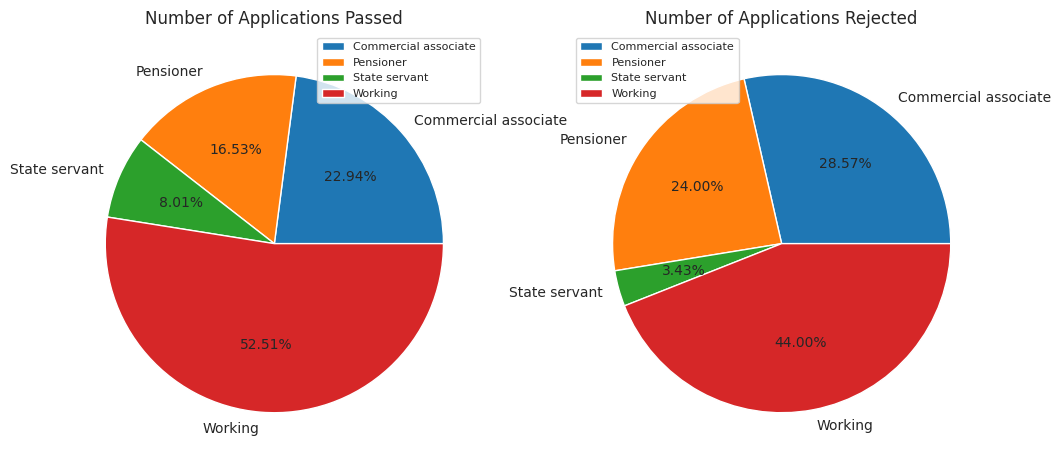

In [750]:
plt.figure(figsize=(12,9))

plt.subplot(1,2,1)
dv[dv['label'] == 0].groupby('Type_Income').size().plot(kind = 'pie', autopct="%.2f%%")
plt.title("Number of Applications Passed")
plt.legend( loc="best", fontsize=8)

plt.subplot(1,2,2)
dv[dv['label'] == 1].groupby('Type_Income').size().plot(kind = 'pie', autopct="%.2f%%")
plt.title("Number of Applications Rejected")
plt.legend( loc="best", fontsize=8)

This code filters the DataFrame dv where the 'label' column is equal to 0(passed applications), then groups the filtered DataFrame by the 'Type_Income' column, and finally returns the count of occurrences within each group.

We can cleary see that Working class has major applications approved irrespective of number of applications.

In [751]:
dv.groupby(['Type_Occupation'])['label'].count()

Type_Occupation
Accountants               44
Cleaning staff            22
Cooking staff             21
Core staff               174
Drivers                   86
HR staff                   3
High skill tech staff     65
IT staff                   2
Laborers                 268
Low-skill Laborers         9
Managers                 136
Medicine staff            50
Pensioner                264
Private service staff     17
Realty agents              2
Sales staff              122
Secretaries                9
Security staff            25
Unknown                  224
Waiters/barmen staff       5
Name: label, dtype: int64

**Insights:**

The code groups the dataset by the type of income and then counts the number of applications .This analysis helps understand the distribution of application across different types of occupation.

In [752]:
income_stats = dv.groupby(['Type_Income'])['Annual_income'].agg(["median", "max"])

# Sort the income statistics by descending order of median income
income_stats_sorted = income_stats.sort_values(by='median', ascending=False)

print(income_stats_sorted)


                        median      max
Type_Income                            
Commercial associate  202500.0  1575000
State servant         180000.0   787500
Working               157500.0   900000
Pensioner             135000.0   630000


***Insights***: 

The code calculates the median and maximum annual income for each type of income listed in the dataset. It then sorts the results based on the median income in descending order, showcasing which type of income has the highest median earnings.

In [753]:
# Median and maximum salary by type of occupation
occupation_income_stats = dv.groupby(['Type_Occupation'])['Annual_income'].agg(["median", "max" ])

occupation_income_stats_sorted = occupation_income_stats.sort_values(by='median', ascending=False)

print(occupation_income_stats_sorted)


                         median      max
Type_Occupation                         
Managers               225000.0  1575000
Drivers                213750.0   585000
Realty agents          202500.0   225000
High skill tech staff  180000.0   900000
Unknown                180000.0   540000
Accountants            180000.0   612000
Laborers               166500.0   900000
Medicine staff         157500.0   306000
Private service staff  157500.0   423000
Core staff             157500.0   450000
Sales staff            157500.0   450000
HR staff               144000.0   180000
Low-skill Laborers     135000.0   225000
Cleaning staff         135000.0   266700
Pensioner              135000.0   630000
Secretaries            135000.0   270000
Security staff         112500.0   810000
Cooking staff          112500.0   495000
IT staff               103500.0   103500
Waiters/barmen staff    94500.0   225000


***Insights*** :  

The provided code computes two statistics, median and maximum salary, for different types of occupations listed in the dataset:

1. **Median Salary by Occupation**: The code calculates the median (middle value) of annual income for each type of occupation. This median value represents the income level at which half of the individuals in a particular occupation earn more, and the other half earn less.

2. **Maximum Salary by Occupation**: Additionally, the code determines the maximum annual income earned by individuals in each type of occupation. This value reflects the highest income earned by any individual within a specific occupation category.

After calculating these statistics, the code sorts the results based on the median salary in descending order (from highest to lowest) and prints the sorted statistics. 

In summary, the code provides insights into the income distribution across different types of occupations, highlighting the median income levels and the maximum income potential within each occupation category.

##### **Does Age relates with Experience in Years?**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


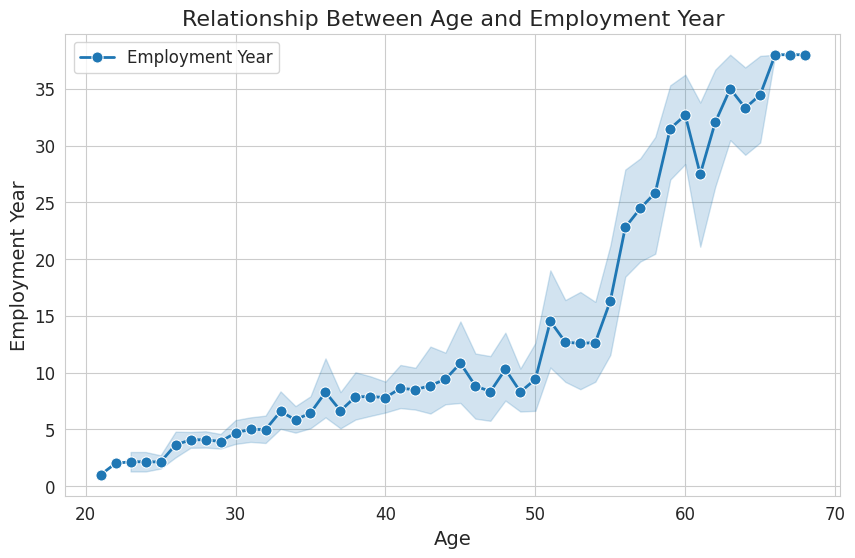

In [754]:
# Setting the style of the plot
sns.set_style("whitegrid")

# Defining custom color palette
colors = ['#1f77b4']  # Blue color

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=dv, x='Age', y='Employment_Year', color=colors[0], marker='o', markersize=8, linewidth=2)

# Setting the title and labels
plt.title('Relationship Between Age and Employment Year', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Employment Year', fontsize=14)

# Setting the font size of ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend with appropriate label
plt.legend(['Employment Year'], loc='best', fontsize=12)

# Display the plot
plt.show()


In [755]:
# Median and maximum salary by type of occupation
occupation_income_stats = dv.groupby(['Age'])['Employment_Year'].agg(["median", "min", "max", "count"])

occupation_income_stats_sorted = occupation_income_stats.sort_values(by='Age', ascending=True)

print(occupation_income_stats_sorted)


     median   min   max  count
Age                           
21      1.0   1.0   1.0      1
22      2.0   2.0   2.0      1
23      2.0   1.0   4.0      7
24      2.0   1.0   4.0      7
25      2.0   0.0   5.0     24
26      4.0   0.0   8.0     19
27      5.0   0.0   8.0     43
28      4.0   1.0   9.0     46
29      4.0   0.0   9.0     39
30      4.0   0.0  11.0     42
31      5.0   0.0  13.0     37
32      3.0   0.0  13.0     44
33      5.0   0.0  38.0     47
34      5.0   0.0  16.0     48
35      6.0   0.0  17.0     43
36      7.0   1.0  38.0     37
37      6.0   0.0  19.0     47
38      5.0   0.0  38.0     43
39      6.0   0.0  20.0     45
40      7.0   0.0  20.0     50
41      7.0   0.0  22.0     39
42      7.0   1.0  38.0     57
43      7.5   1.0  38.0     28
44      7.0   0.0  38.0     53
45      7.0   1.0  38.0     28
46      7.0   0.0  38.0     34
47      5.0   0.0  38.0     40
48      6.0   1.0  38.0     41
49      8.0   1.0  29.0     37
50      8.0   0.0  38.0     35
51     1

***Insights***:

The above provided code calculates various statistics related to the employment years based on age groups in the dataset:

1. **Median Employment Year**: For each age group, it calculates the median number of years of employment, which represents the midpoint value of the distribution of employment years. This gives an idea of the typical duration of employment for individuals in different age brackets.

2. **Minimum Employment Year**: It determines the minimum number of years of employment within each age group, indicating the shortest duration of employment among individuals in that age category.

3. **Maximum Employment Year**: This calculates the maximum number of years of employment within each age group, representing the longest duration of employment among individuals in that age bracket.

4. **Count**: The count indicates the number of individuals in each age group, providing insight into the sample size or population size for each age category.

The code then sorts these statistics based on age in ascending order and displays the results. Overall, it helps in understanding the distribution of employment years across different age groups in the dataset.

In [756]:
dv.select_dtypes(include=['int64', 'float64']).columns


Index(['Ind_ID', 'Children', 'Annual_income', 'Age', 'Employment_Year',
       'Mobile_phone', 'Work_Phone', 'Phone', 'Email_ID', 'Family_Members',
       'label'],
      dtype='object')

##### **Provide the Distribution plot for 'Children', 'Annual_income', 'Age', 'Employment_Year' and show 'Mean', and 'Median' values of same**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

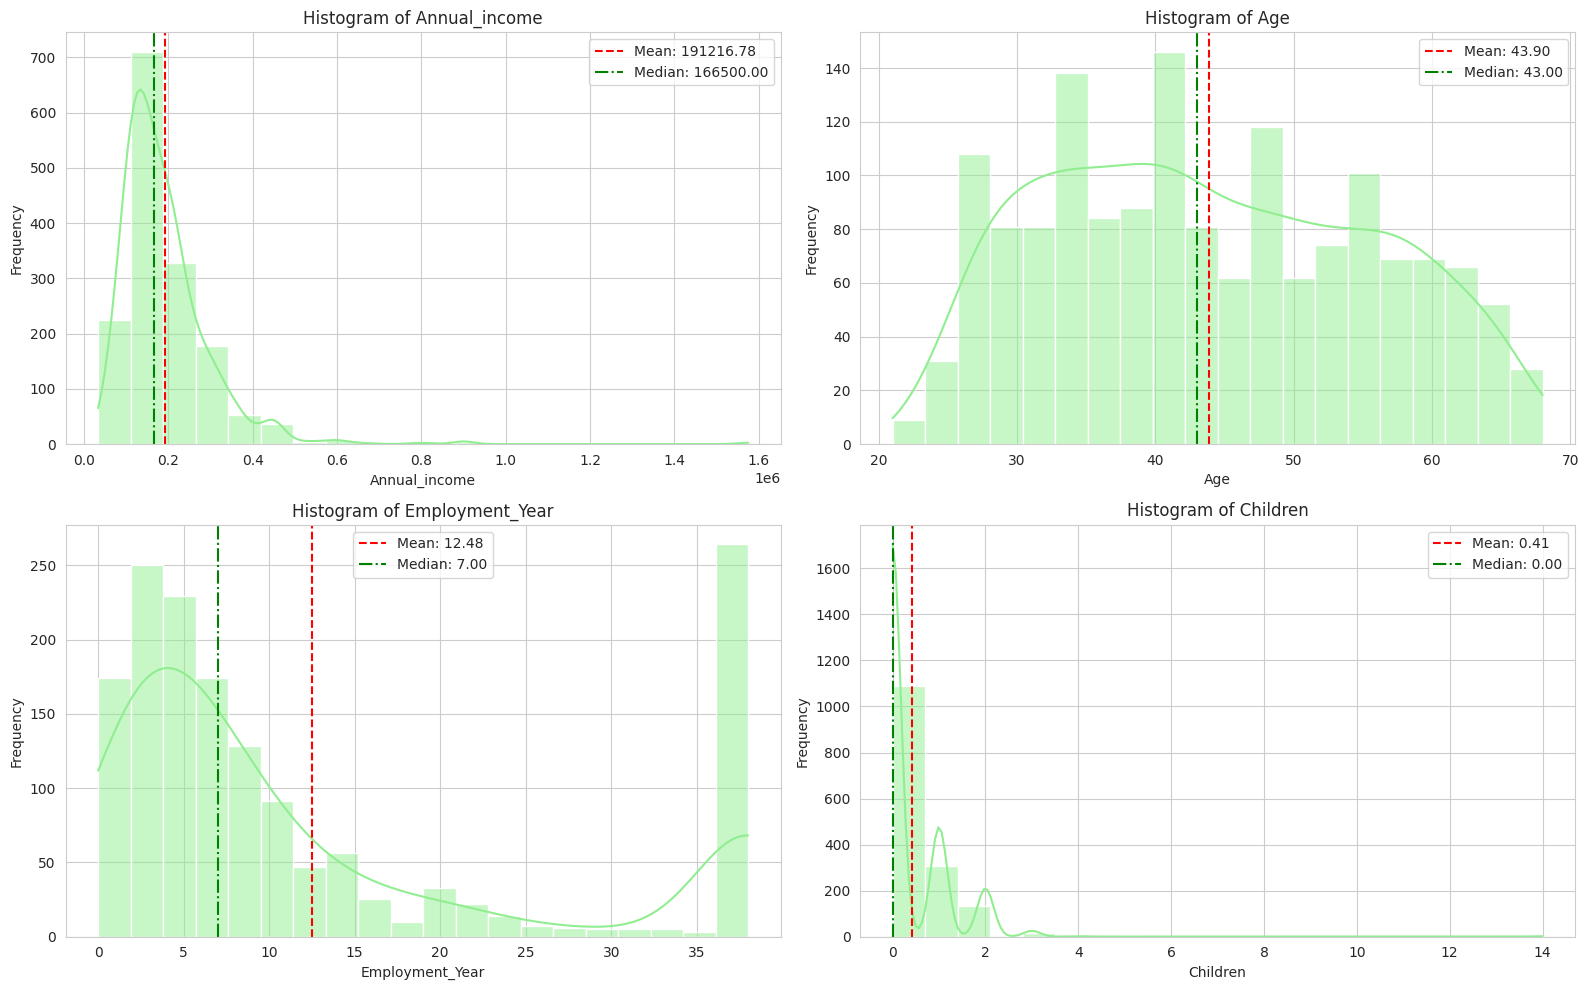

In [757]:
# Plot histograms for each numeric column
numeric_columns = ['Annual_income', 'Age', 'Employment_Year','Children']

plt.figure(figsize=(16, 10))

for i, column in enumerate(numeric_columns, start=1):
    # Plot histogram
    plt.subplot(2, 2, i)
    sns.histplot(dv[column], bins=20, color='lightgreen', kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    
    # Calculate mean and median
    mean_value = dv[column].mean()
    median_value = dv[column].median()
    
    # Plot mean and median lines
    plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(x=median_value, color='green', linestyle='-.', label=f'Median: {median_value:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()


### **Bivariate Analysis**

In [758]:
dv.head()

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_income  \
0  5008827      M         Y              Y         0         180000   
1  5009744      F         Y              N         0         315000   
2  5009746      F         Y              N         0         315000   
3  5009749      F         Y              N         0         315000   
4  5009752      F         Y              N         0         315000   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Age  Employment_Year  Mobile_phone  Work_Phone  Phone  Email_ID  \
0   51             38.0             1           0      0         0   
1   37              2.0             1           1      1         0   
2   37              2.0             1           1      1         0   
3   37              2.0             1           1      1         0   
4   37              2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0       Pensioner               2      1  
1         Unknown               2      1  
2         Unknown               2      1  
3         Unknown               2      1  
4         Unknown               2      1

<Axes: xlabel='Employment_Year', ylabel='Annual_income'>

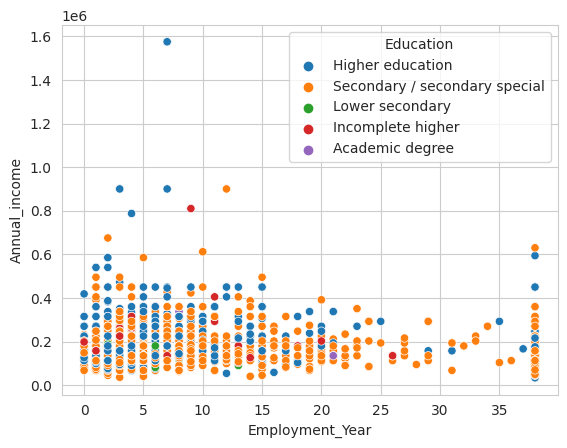

In [759]:
sns.scatterplot(data=dv, y='Annual_income', x="Employment_Year", hue = 'Education')

<Axes: xlabel='Type_Income', ylabel='Employment_Year'>

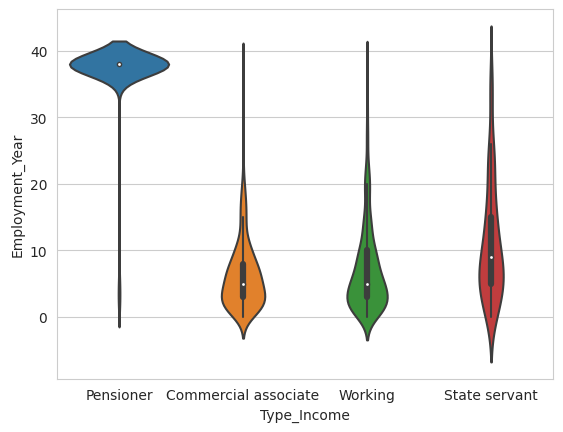

In [760]:
sns.violinplot(data=dv, x='Type_Income', y="Employment_Year")

**Insights:**
- The above plot talks about experience in years for type of income category. 

##### **Provide details of gender who purchased car and what is the major range of age for the same?**

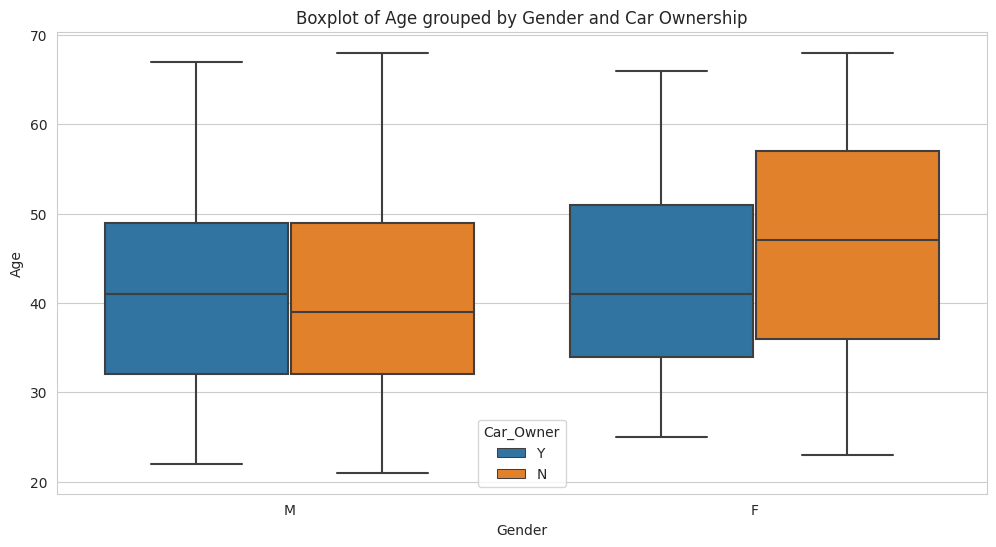

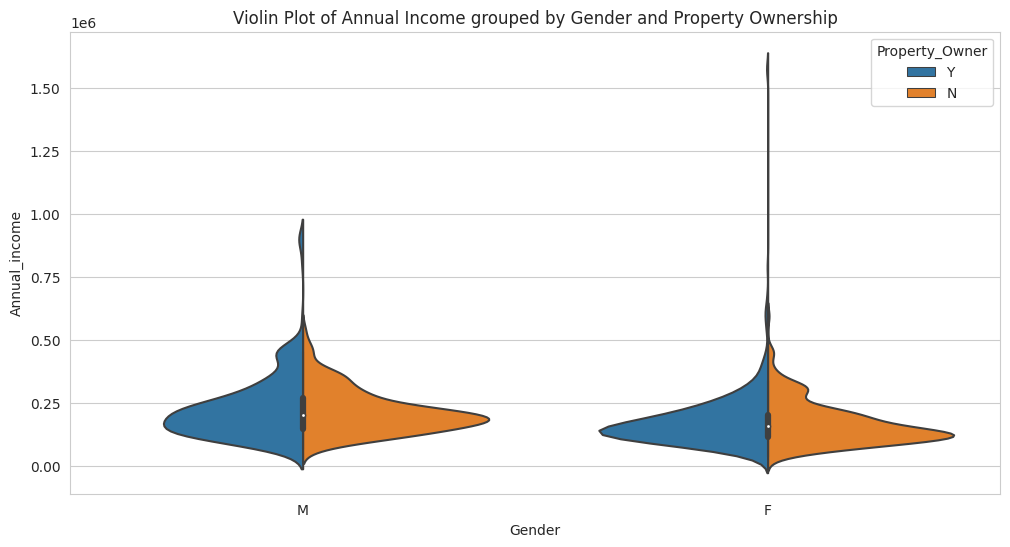

In [761]:
# Boxplot with Categorical Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=dv, x='Gender', y='Age', hue='Car_Owner')
plt.title('Boxplot of Age grouped by Gender and Car Ownership')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=dv, x='Gender', y='Annual_income', hue='Property_Owner', split=True)
plt.title('Violin Plot of Annual Income grouped by Gender and Property Ownership')
plt.show()


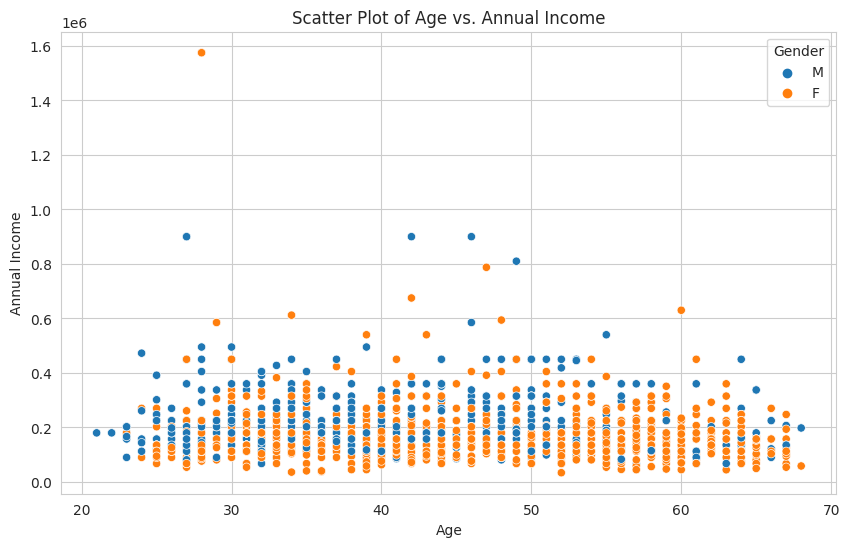

In [762]:
# Scatter plot for Age vs. Annual_income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dv, x='Age', y='Annual_income', hue='Gender')
plt.title('Scatter Plot of Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


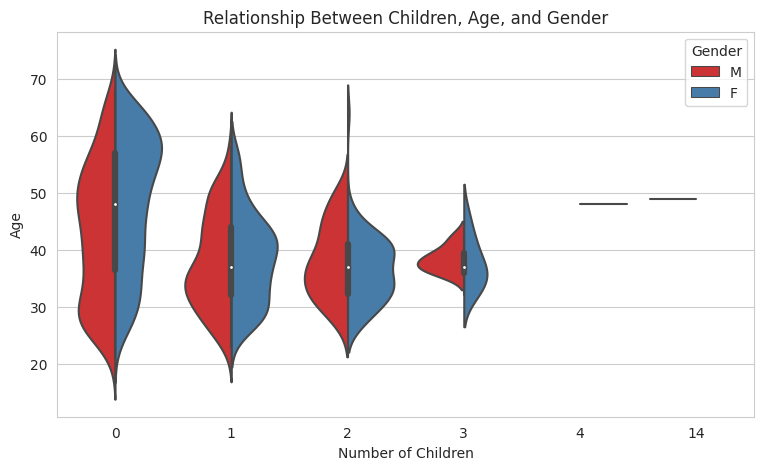

In [763]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a violin plot
plt.figure(figsize=(9, 5))
sns.violinplot(data=dv, x='Children', y='Age', hue='Gender', palette='Set1', split=True)
plt.title('Relationship Between Children, Age, and Gender')
plt.xlabel('Number of Children')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()


## <font color="darkblue">***3 - New Dataset - Savepoint 3***</font>

## <font color="red">**E. Graphical Representation of KNN and MICE Imputation**</font> 


In [764]:
df3 = pd.read_csv("4.Credit_card_clean_Data_Analysis.csv")

In [765]:
print(df3.isna().sum())

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Age                0
Employment_Year    0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64


***Creating another copy to plot graph for comparing distribution before imputation and after imputation and with KNN & MICE***

<font color="red">**"dfmice" dataset is created after Savepoint 4, but just for compairng KNN-Imputed values with MICE-Imputation, have shown below plots. Here for this data KNN-Imputation suits the best for Imputating values, and hence we go for further analysis using the KNN-Imputed values. MICE-Imputation is performed below with another dataset (categorical to - numerical converted dataset) just for information and to fetch plots to compare in this case**.</font> 

In [766]:
dfmice = pd.read_csv("/kaggle/input/credit-card-approval-system-datasets/dfmice.csv")

In [767]:
dfmice1 = dfmice.copy()

##### **Annual_income comparison**

/tmp/ipykernel_33/733304567.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Annual_income'], color = 'black',  label = "Without MICE")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/733304567.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an

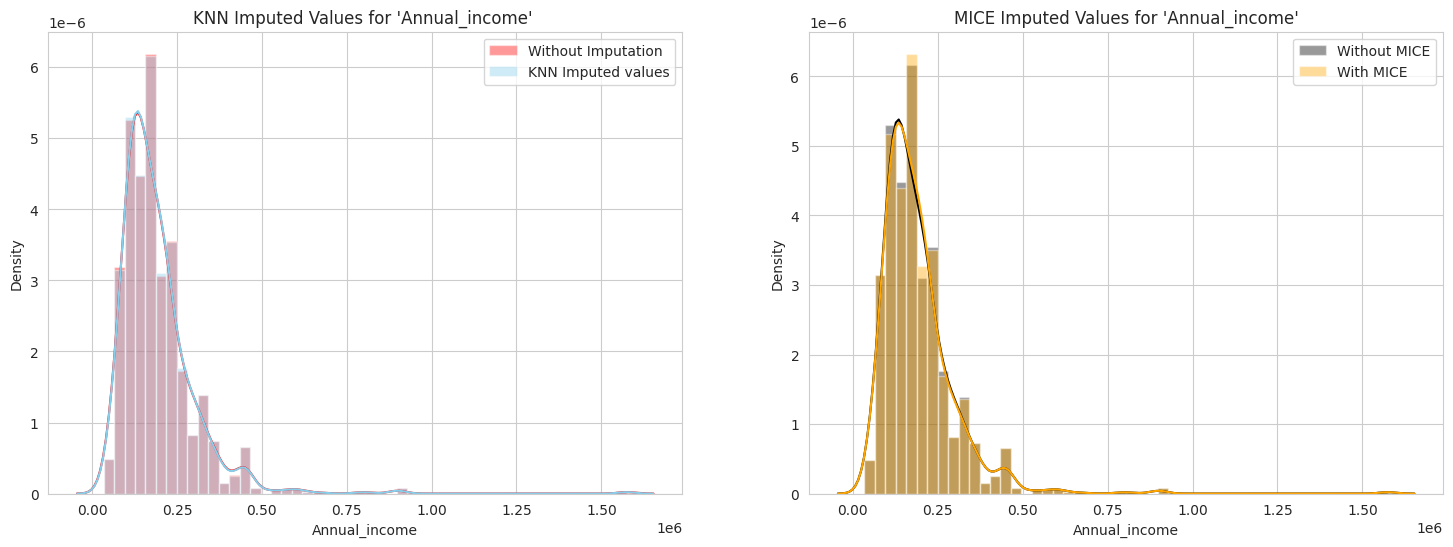

In [768]:
plt.figure(figsize=(18,6))

# Plot for MICE vs Without MICE
plt.subplot(1,2,2)
sns.distplot(df3['Annual_income'], color = 'black',  label = "Without MICE")
sns.distplot(dfmice1['Annual_income'], color = 'orange', label = "With MICE")
plt.legend()
plt.title("MICE Imputed Values for 'Annual_income'")
plt.grid(True)  # Adding gridlines

# Plot for KNN Imputed vs Without Imputed
plt.subplot(1,2,1)
sns.distplot(df["Annual_income"], kde=True, color = 'red', label = 'Without Imputation')
sns.distplot(df3["Annual_income"], kde=True, color='skyblue', label = 'KNN Imputed values')
plt.title("KNN Imputed Values for 'Annual_income' ")
plt.grid(True)  # Adding gridlines
plt.legend()

plt.show()

##### **Age comparison**

/tmp/ipykernel_33/259428918.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'], color='black', label="Without MICE")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/259428918.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level fun

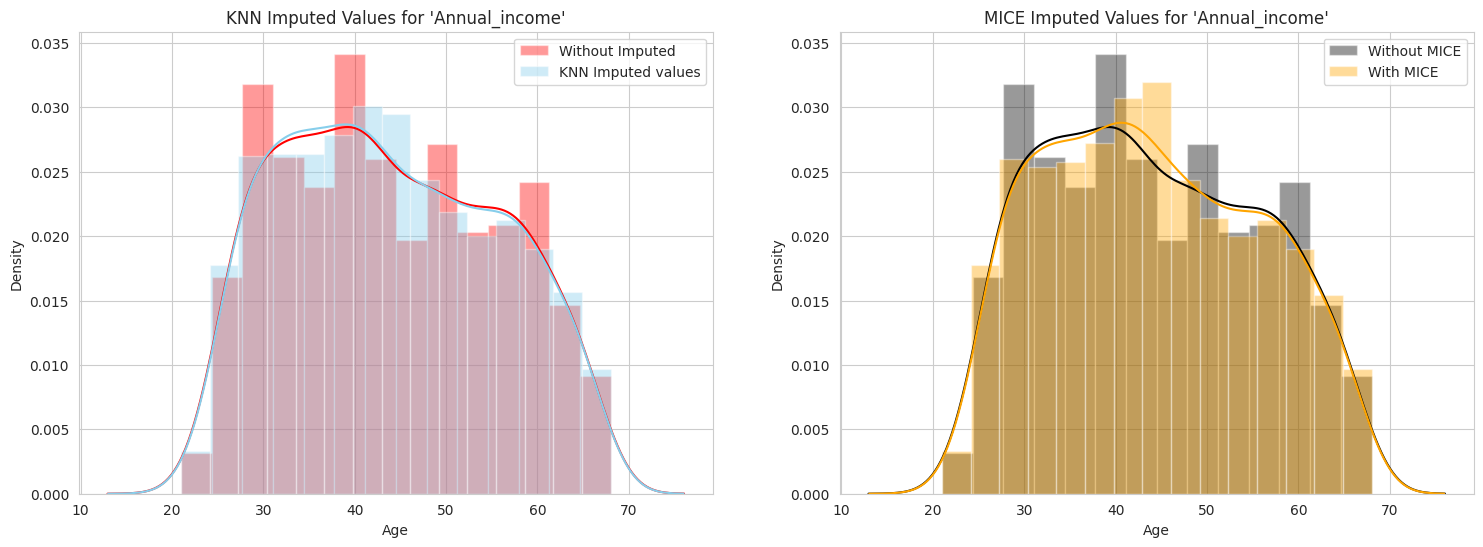

In [769]:
plt.figure(figsize=(18,6))

# Plot for MICE vs Without MICE
plt.subplot(1,2,2)
sns.distplot(df1['Age'], color='black', label="Without MICE")
sns.distplot(dfmice1['Age'], color='orange', label="With MICE")
plt.legend()
plt.title("MICE Imputed Values for 'Annual_income'")
plt.grid(True)  # Adding gridlines

# Plot for KNN Imputed vs Without Imputed
plt.subplot(1,2,1)
sns.distplot(df["Age"], kde=True, color='red', label="Without Imputed")
sns.distplot(df3["Age"], kde=True, color='skyblue', label="KNN Imputed values")
plt.title("KNN Imputed Values for 'Annual_income'")
plt.legend()
plt.grid(True)  # Adding gridlines

plt.show()


From above graph we can say that distribution is quite normal and an use the imputed values by KNN method for further analysis

In [770]:
df3.sample(3)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1508  5009798      F         N             N         0         198000   
191   5067849      F         N             Y         0         180000   
503   5132264      F         N             N         0         144000   

               Type_Income                      EDUCATION  \
1508             Pensioner  Secondary / secondary special   
191   Commercial associate  Secondary / secondary special   
503                Working  Secondary / secondary special   

            Marital_status       Housing_type  Age  Employment_Year  \
1508                 Widow  House / apartment   60             38.0   
191   Single / not married  House / apartment   40              2.0   
503                Married  House / apartment   41              6.0   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1508             1           0      1         0       Pensioner   
191              1           0      0         0         Unknown   
503              1           0      1         0        Laborers   

      Family_Members  label  
1508               1      0  
191                1      0  
503                2      0

### 

------

## <font color="red">**F. Feature Engineering : Label Encodings**</font> 


### **Details about "object" type columns**

In [771]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   int64  
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1548 non-null   int64  
 11  Employment_Year  1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [772]:
df3.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Age                0
Employment_Year    0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [773]:
df3.select_dtypes(include='object').columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')

In [774]:
cols = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

for col in cols:
    unique_values = df3[col].unique()
    print(f"Column: {col}")
    for val in unique_values:
        ct = (df3[col] == val).sum()
        print(f"Value: {val}", "-->", f"Count: {ct}")
    print("-------" * 7)


Column: GENDER
Value: M --> Count: 568
Value: F --> Count: 980
-------------------------------------------------
Column: Car_Owner
Value: Y --> Count: 624
Value: N --> Count: 924
-------------------------------------------------
Column: Propert_Owner
Value: Y --> Count: 1010
Value: N --> Count: 538
-------------------------------------------------
Column: Type_Income
Value: Pensioner --> Count: 269
Value: Commercial associate --> Count: 365
Value: Working --> Count: 798
Value: State servant --> Count: 116
-------------------------------------------------
Column: EDUCATION
Value: Higher education --> Count: 426
Value: Secondary / secondary special --> Count: 1031
Value: Lower secondary --> Count: 21
Value: Incomplete higher --> Count: 68
Value: Academic degree --> Count: 2
-------------------------------------------------
Column: Marital_status
Value: Married --> Count: 1049
Value: Single / not married --> Count: 227
Value: Civil marriage --> Count: 101
Value: Separated --> Count: 96
Va

### **Label Encoding**

**Ordinal data : Ordinal Encoding (using map / Encoder())**

        Type_Occupation
        Car_Owner
        Propert_Owner
        Housing_type
        EDUCATION
        Type_Income

**Nomial Data : get_dummies**

        GENDER
        Marital_status

#### **Nominal Data Conversion**

**GENDER & Martial_status**

In [775]:
df3 = pd.get_dummies(df3, columns = ["GENDER", "Marital_status",], drop_first=True)

In [776]:
df3.sample(3)

Ind_ID Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1128  5105185         N             Y         0         180000   
1536  5033447         Y             N         0         112500   
176   5069057         Y             N         0         225000   

               Type_Income                      EDUCATION       Housing_type  \
1128               Working  Secondary / secondary special  House / apartment   
1536  Commercial associate               Higher education  House / apartment   
176   Commercial associate  Secondary / secondary special  House / apartment   

      Age  Employment_Year  ...  Phone  EMAIL_ID  Type_Occupation  \
1128   44              2.0  ...      0         0         Laborers   
1536   30              2.0  ...      0         0       Core staff   
176    49              7.0  ...      0         0         Laborers   

      Family_Members label  GENDER_M  Marital_status_Married  \
1128               2     0      True                    True   
1536               2     0     False                    True   
176                2     0      True                    True   

      Marital_status_Separated  Marital_status_Single / not married  \
1128                     False                                False   
1536                     False                                False   
176                      False                                False   

      Marital_status_Widow  
1128                 False  
1536                 False  
176                  False  

[3 rows x 22 columns]

#### **Ordinal Data Conversion - get_dummies**

##### **Conversion of "Car_Owner" & "Propert_Owner" column**

In [777]:
df3 = pd.get_dummies(df3, columns = ["Car_Owner", "Propert_Owner",], drop_first=True)

##### **Conversion of "Type_Income" column**

Here we can go for ordinal encoder but, analyzing the data we understood that income ranges are highly variable in all of the income types and placing them in a ranking is bit difficult hence we go for get_dummies for this case, even though its an ordinal data.

In [778]:
df3['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [779]:
df3 = pd.get_dummies(df3, columns = ["Type_Income"], drop_first=True)

In [780]:
df3.head()

Ind_ID  CHILDREN  Annual_income         EDUCATION       Housing_type  Age  \
0  5008827         0         180000  Higher education  House / apartment   51   
1  5009744         0         315000  Higher education  House / apartment   37   
2  5009746         0         315000  Higher education  House / apartment   37   
3  5009749         0         315000  Higher education  House / apartment   37   
4  5009752         0         315000  Higher education  House / apartment   37   

   Employment_Year  Mobile_phone  Work_Phone  Phone  ...  GENDER_M  \
0             38.0             1           0      0  ...      True   
1              2.0             1           1      1  ...     False   
2              2.0             1           1      1  ...     False   
3              2.0             1           1      1  ...     False   
4              2.0             1           1      1  ...     False   

  Marital_status_Married  Marital_status_Separated  \
0                   True                     False   
1                   True                     False   
2                   True                     False   
3                   True                     False   
4                   True                     False   

   Marital_status_Single / not married  Marital_status_Widow  Car_Owner_Y  \
0                                False                 False         True   
1                                False                 False         True   
2                                False                 False         True   
3                                False                 False         True   
4                                False                 False         True   

   Propert_Owner_Y  Type_Income_Pensioner  Type_Income_State servant  \
0             True                   True                      False   
1            False                  False                      False   
2            False                  False                      False   
3            False                  False                      False   
4            False                  False                      False   

   Type_Income_Working  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 24 columns]

#### **Ordinal Data Conversion - ordinal_encoder**

##### **Conversion of "Type_Occupation" column**

In [781]:
df3['Type_Occupation'].unique()

array(['Pensioner', 'Unknown', 'Core staff', 'Cooking staff', 'Laborers',
       'Sales staff', 'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [782]:
from sklearn.preprocessing import OrdinalEncoder

rank = ['Pensioner', 'Unknown', 'Core staff', 'Cooking staff', 'Laborers',
       'Sales staff', 'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents']

oe = OrdinalEncoder(categories=[rank])
df3['Type_Occupation'] = oe.fit_transform(df3[['Type_Occupation']])
df3.sample(4)

Ind_ID  CHILDREN  Annual_income                      EDUCATION  \
762  5116343         1         225000  Secondary / secondary special   
688  5139761         0         337500               Higher education   
68   5058530         0         391500  Secondary / secondary special   
928  5054460         1         135000  Secondary / secondary special   

            Housing_type  Age  Employment_Year  Mobile_phone  Work_Phone  \
762    House / apartment   32             11.0             1           1   
688    House / apartment   65             21.0             1           0   
68   Municipal apartment   25              1.0             1           0   
928    House / apartment   52              5.0             1           0   

     Phone  ...  GENDER_M  Marital_status_Married  Marital_status_Separated  \
762      0  ...      True                    True                     False   
688      0  ...      True                    True                     False   
68       0  ...      True                   False                     False   
928      1  ...      True                    True                     False   

     Marital_status_Single / not married  Marital_status_Widow  Car_Owner_Y  \
762                                False                 False         True   
688                                False                 False         True   
68                                  True                 False        False   
928                                False                 False         True   

     Propert_Owner_Y  Type_Income_Pensioner  Type_Income_State servant  \
762             True                  False                       True   
688             True                  False                      False   
68             False                  False                      False   
928            False                  False                      False   

     Type_Income_Working  
762                False  
688                 True  
68                  True  
928                 True  

[4 rows x 24 columns]

In [783]:
df3['Type_Occupation'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

##### **Conversion of "Housing_type" column - Ordinal Encode (map)**

In [784]:
df3['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [785]:
mappings = {"Housing_type" : 
    {
        'With parents':0,
        'Rented apartment':1,
        'Municipal apartment':2,
        'Co-op apartment':3, 
        'Office apartment':4,
        'House / apartment':5
    }
}

for i in df1:
    if i in mappings:
        df3[i] = df3[i].map(mappings[i])

df3['Housing_type'].head()

0    5
1    5
2    5
3    5
4    5
Name: Housing_type, dtype: int64

In [786]:
df3.sample(4)

Ind_ID  CHILDREN  Annual_income                      EDUCATION  \
556  5042097         1         108000  Secondary / secondary special   
836  5009791         0         198000  Secondary / secondary special   
480  5092164         0          45900  Secondary / secondary special   
742  5149744         1         105750  Secondary / secondary special   

     Housing_type  Age  Employment_Year  Mobile_phone  Work_Phone  Phone  ...  \
556             5   39             11.0             1           0      1  ...   
836             5   60             38.0             1           0      1  ...   
480             5   56             38.0             1           0      1  ...   
742             0   35              4.0             1           0      0  ...   

     GENDER_M  Marital_status_Married  Marital_status_Separated  \
556     False                   False                      True   
836     False                   False                     False   
480     False                   False                     False   
742     False                    True                     False   

     Marital_status_Single / not married  Marital_status_Widow  Car_Owner_Y  \
556                                False                 False        False   
836                                False                  True        False   
480                                False                  True         True   
742                                False                 False        False   

     Propert_Owner_Y  Type_Income_Pensioner  Type_Income_State servant  \
556            False                  False                      False   
836            False                   True                      False   
480             True                   True                      False   
742             True                  False                      False   

     Type_Income_Working  
556                 True  
836                False  
480                False  
742                 True  

[4 rows x 24 columns]

##### **Conversion of "EDUCATION" column - Ordinal Encode (map)**

In [787]:
df3['EDUCATION'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [788]:
mappings = {"EDUCATION" : 
    {
        'Lower secondary':0,
        'Secondary / secondary special':1,
        'Incomplete higher':2,
        'Higher education':3, 
        'Academic degree':4,
    }
}

for i in df3:
    if i in mappings:
        df3[i] = df3[i].map(mappings[i])

df3['EDUCATION'].head()

0    3
1    3
2    3
3    3
4    3
Name: EDUCATION, dtype: int64

In [789]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ind_ID                               1548 non-null   int64  
 1   CHILDREN                             1548 non-null   int64  
 2   Annual_income                        1548 non-null   int64  
 3   EDUCATION                            1548 non-null   int64  
 4   Housing_type                         1548 non-null   int64  
 5   Age                                  1548 non-null   int64  
 6   Employment_Year                      1548 non-null   float64
 7   Mobile_phone                         1548 non-null   int64  
 8   Work_Phone                           1548 non-null   int64  
 9   Phone                                1548 non-null   int64  
 10  EMAIL_ID                             1548 non-null   int64  
 11  Type_Occupation               

***from above we confirm that whole dataset is converted to numerical data type and have replaced all the object type data to numerical ones, further we can proceed for prediction values using MICE for filling null values in those converted categorical columns***

In [790]:
df3.isnull().sum()

Ind_ID                                 0
CHILDREN                               0
Annual_income                          0
EDUCATION                              0
Housing_type                           0
Age                                    0
Employment_Year                        0
Mobile_phone                           0
Work_Phone                             0
Phone                                  0
EMAIL_ID                               0
Type_Occupation                        0
Family_Members                         0
label                                  0
GENDER_M                               0
Marital_status_Married                 0
Marital_status_Separated               0
Marital_status_Single / not married    0
Marital_status_Widow                   0
Car_Owner_Y                            0
Propert_Owner_Y                        0
Type_Income_Pensioner                  0
Type_Income_State servant              0
Type_Income_Working                    0
dtype: int64

In [791]:
df3.head()

Ind_ID  CHILDREN  Annual_income  EDUCATION  Housing_type  Age  \
0  5008827         0         180000          3             5   51   
1  5009744         0         315000          3             5   37   
2  5009746         0         315000          3             5   37   
3  5009749         0         315000          3             5   37   
4  5009752         0         315000          3             5   37   

   Employment_Year  Mobile_phone  Work_Phone  Phone  ...  GENDER_M  \
0             38.0             1           0      0  ...      True   
1              2.0             1           1      1  ...     False   
2              2.0             1           1      1  ...     False   
3              2.0             1           1      1  ...     False   
4              2.0             1           1      1  ...     False   

   Marital_status_Married  Marital_status_Separated  \
0                    True                     False   
1                    True                     False   
2                    True                     False   
3                    True                     False   
4                    True                     False   

   Marital_status_Single / not married  Marital_status_Widow  Car_Owner_Y  \
0                                False                 False         True   
1                                False                 False         True   
2                                False                 False         True   
3                                False                 False         True   
4                                False                 False         True   

   Propert_Owner_Y  Type_Income_Pensioner  Type_Income_State servant  \
0             True                   True                      False   
1            False                  False                      False   
2            False                  False                      False   
3            False                  False                      False   
4            False                  False                      False   

   Type_Income_Working  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 24 columns]

In [792]:
df3.to_csv("5.Credit_card_Cleaned_ML.csv", index = False)

## <font color="darkblue">The above created dataset could be used for model training in Machine Learning further.</font> 


## <font color="darkblue">***4 - New Dataset - Savepoint 4***</font> 


    df4 = pd.read_csv("5.Credit_card_Cleaned.csv")

#

-----

-----

## <font color="red">**CAUTION BEFORE RUNNING CODES FOR MICE IMPUTED VALUES THEY'RE JUST FOR COMPARISON PURPOSE with KNN iMPUTATION**</font> 
## <font color="red">**MICE Imputation for Age, Income**</font> 

In [793]:
dfmice = df1.copy() 

We're using df1 dataset, as we need empty/null values in columns to be filled.

In [794]:
dfmice.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employment_Year      0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [795]:
dfmice.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

    Age  Employment_Year  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0  51.0             38.0             1           0      0         0   
1  37.0              2.0             1           1      1         0   
2   NaN              2.0             1           1      1         0   
3  37.0              2.0             1           1      1         0   
4  37.0              2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [796]:
import pandas as pd
from fancyimpute import IterativeImputer

# Assuming Capped_values_2_CCB2 is your DataFrame
# Select only the relevant columns for imputation
columns_to_impute = ["Age", "Annual_income"]

# Perform MICE imputation
imputer = IterativeImputer()
dfmice[columns_to_impute] = imputer.fit_transform(dfmice[columns_to_impute])

# Check if null values have been filled
print(dfmice[columns_to_impute].isnull().sum())

Age              0
Annual_income    0
dtype: int64


We've imputed values for "Age" and "Annual_income" columns in "dfmice" dataset.

In [797]:
dfmice.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                  0
Employment_Year      0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [798]:
dfmice.to_csv("dfmice.csv", index = False)

In [799]:
dfmice.loc[:, 'Annual_income':"Age"]

Annual_income           Type_Income                      EDUCATION  \
0     180000.000000             Pensioner               Higher education   
1     315000.000000  Commercial associate               Higher education   
2     315000.000000  Commercial associate               Higher education   
3     198626.375557  Commercial associate               Higher education   
4     315000.000000  Commercial associate               Higher education   
...             ...                   ...                            ...   
1543  202802.780917  Commercial associate               Higher education   
1544  225000.000000  Commercial associate              Incomplete higher   
1545  180000.000000               Working               Higher education   
1546  270000.000000               Working  Secondary / secondary special   
1547  225000.000000               Working               Higher education   

            Marital_status       Housing_type        Age  
0                  Married  House / apartment  51.000000  
1                  Married  House / apartment  37.000000  
2                  Married  House / apartment  42.524097  
3                  Married  House / apartment  37.000000  
4                  Married  House / apartment  37.000000  
...                    ...                ...        ...  
1543               Married  House / apartment  33.000000  
1544  Single / not married  House / apartment  28.000000  
1545               Married  House / apartment  36.000000  
1546        Civil marriage  House / apartment  42.000000  
1547               Married  House / apartment  45.000000  

[1548 rows x 6 columns]

/tmp/ipykernel_33/873382007.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Annual_income'], color = 'black',  label = "Without MICE")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/873382007.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an

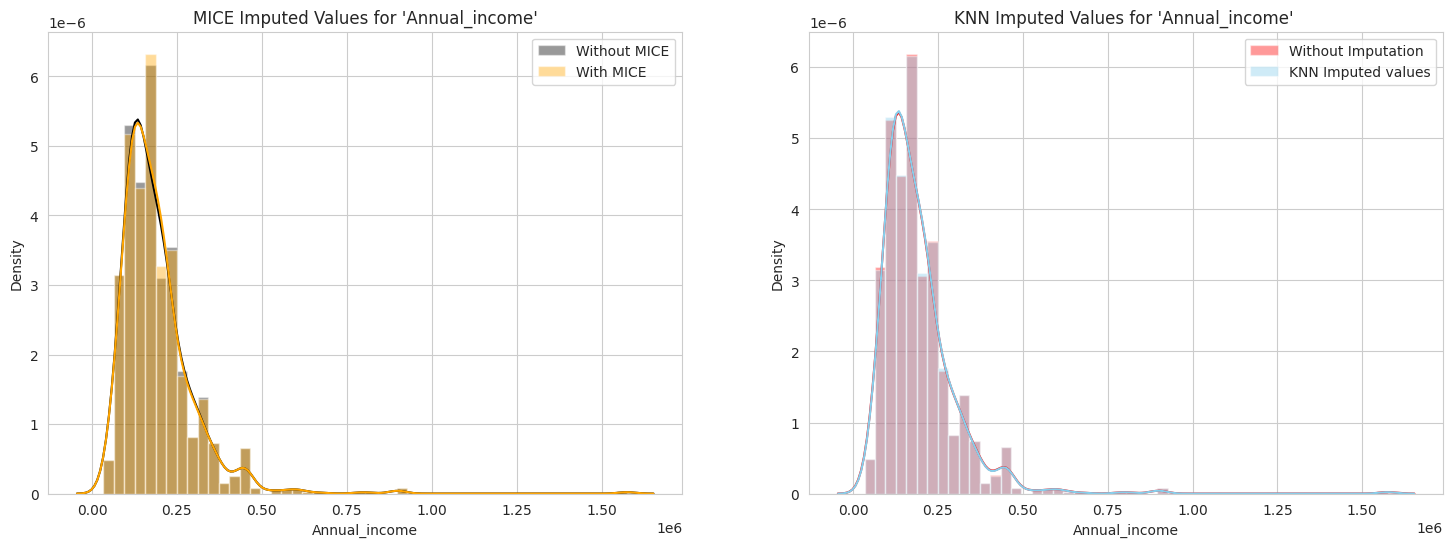

In [800]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df3['Annual_income'], color = 'black',  label = "Without MICE")
sns.distplot(dfmice['Annual_income'], color = 'orange', label = "With MICE")
plt.legend()
plt.title("MICE Imputed Values for 'Annual_income'")

plt.subplot(1,2,2)
sns.distplot(df["Annual_income"], kde=True, color = 'red', label = 'Without Imputation')
sns.distplot(df3["Annual_income"], kde=True, color='skyblue', label = 'KNN Imputed values')
plt.title("KNN Imputed Values for 'Annual_income' ")
plt.legend()
plt.show()

/tmp/ipykernel_33/1594115151.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'], color = 'black', label = "Without MICE")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/1594115151.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-lev

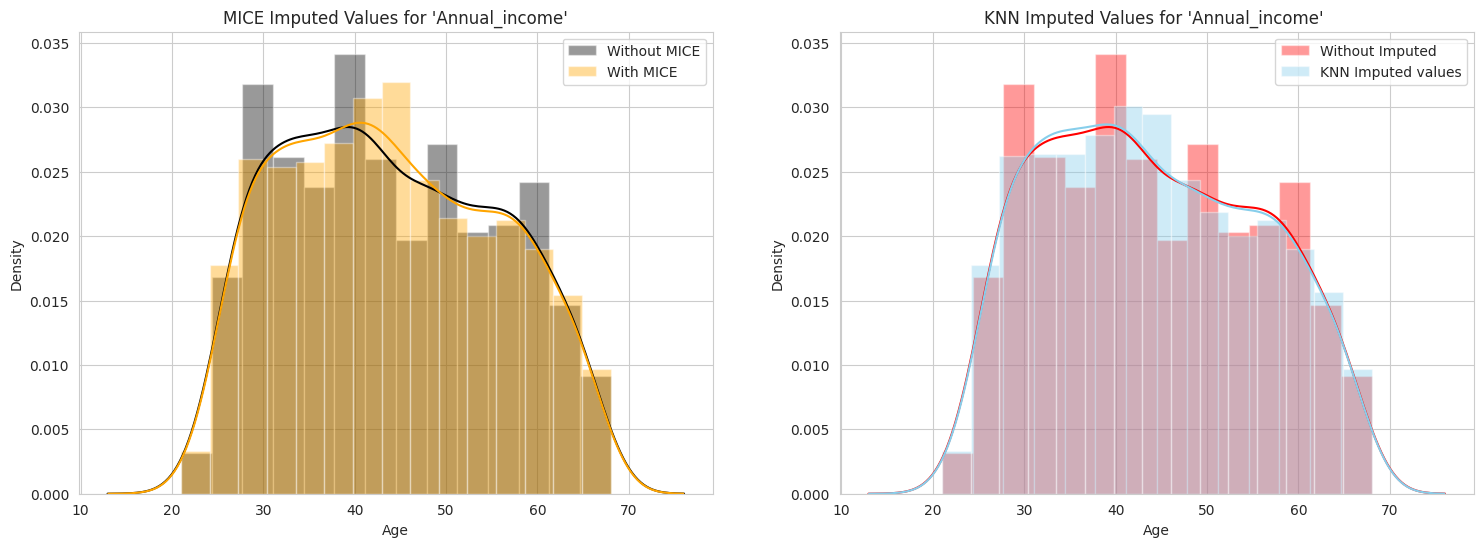

In [801]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df1['Age'], color = 'black', label = "Without MICE")
sns.distplot(dfmice['Age'], color = 'orange', label = "With MICE")
plt.legend()
plt.title("MICE Imputed Values for 'Annual_income'")

plt.subplot(1,2,2)
sns.distplot(df["Age"], kde=True, color = 'red', label="Without Imputed")
sns.distplot(df3["Age"], kde=True, color='skyblue', label = "KNN Imputed values")
plt.title("KNN Imputed Values for 'Annual_income' ")
plt.legend()
plt.show()



##


-----

-----

## <font color="red">**G. Feature Selection & Feature Scaling**</font> 


In [802]:
df4 = pd.read_csv("5.Credit_card_Cleaned_ML.csv")

In [803]:
df4.head()

Ind_ID  CHILDREN  Annual_income  EDUCATION  Housing_type  Age  \
0  5008827         0         180000          3             5   51   
1  5009744         0         315000          3             5   37   
2  5009746         0         315000          3             5   37   
3  5009749         0         315000          3             5   37   
4  5009752         0         315000          3             5   37   

   Employment_Year  Mobile_phone  Work_Phone  Phone  ...  GENDER_M  \
0             38.0             1           0      0  ...      True   
1              2.0             1           1      1  ...     False   
2              2.0             1           1      1  ...     False   
3              2.0             1           1      1  ...     False   
4              2.0             1           1      1  ...     False   

   Marital_status_Married  Marital_status_Separated  \
0                    True                     False   
1                    True                     False   
2                    True                     False   
3                    True                     False   
4                    True                     False   

   Marital_status_Single / not married  Marital_status_Widow  Car_Owner_Y  \
0                                False                 False         True   
1                                False                 False         True   
2                                False                 False         True   
3                                False                 False         True   
4                                False                 False         True   

   Propert_Owner_Y  Type_Income_Pensioner  Type_Income_State servant  \
0             True                   True                      False   
1            False                  False                      False   
2            False                  False                      False   
3            False                  False                      False   
4            False                  False                      False   

   Type_Income_Working  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 24 columns]

In [804]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ind_ID                               1548 non-null   int64  
 1   CHILDREN                             1548 non-null   int64  
 2   Annual_income                        1548 non-null   int64  
 3   EDUCATION                            1548 non-null   int64  
 4   Housing_type                         1548 non-null   int64  
 5   Age                                  1548 non-null   int64  
 6   Employment_Year                      1548 non-null   float64
 7   Mobile_phone                         1548 non-null   int64  
 8   Work_Phone                           1548 non-null   int64  
 9   Phone                                1548 non-null   int64  
 10  EMAIL_ID                             1548 non-null   int64  
 11  Type_Occupation               

<Axes: >

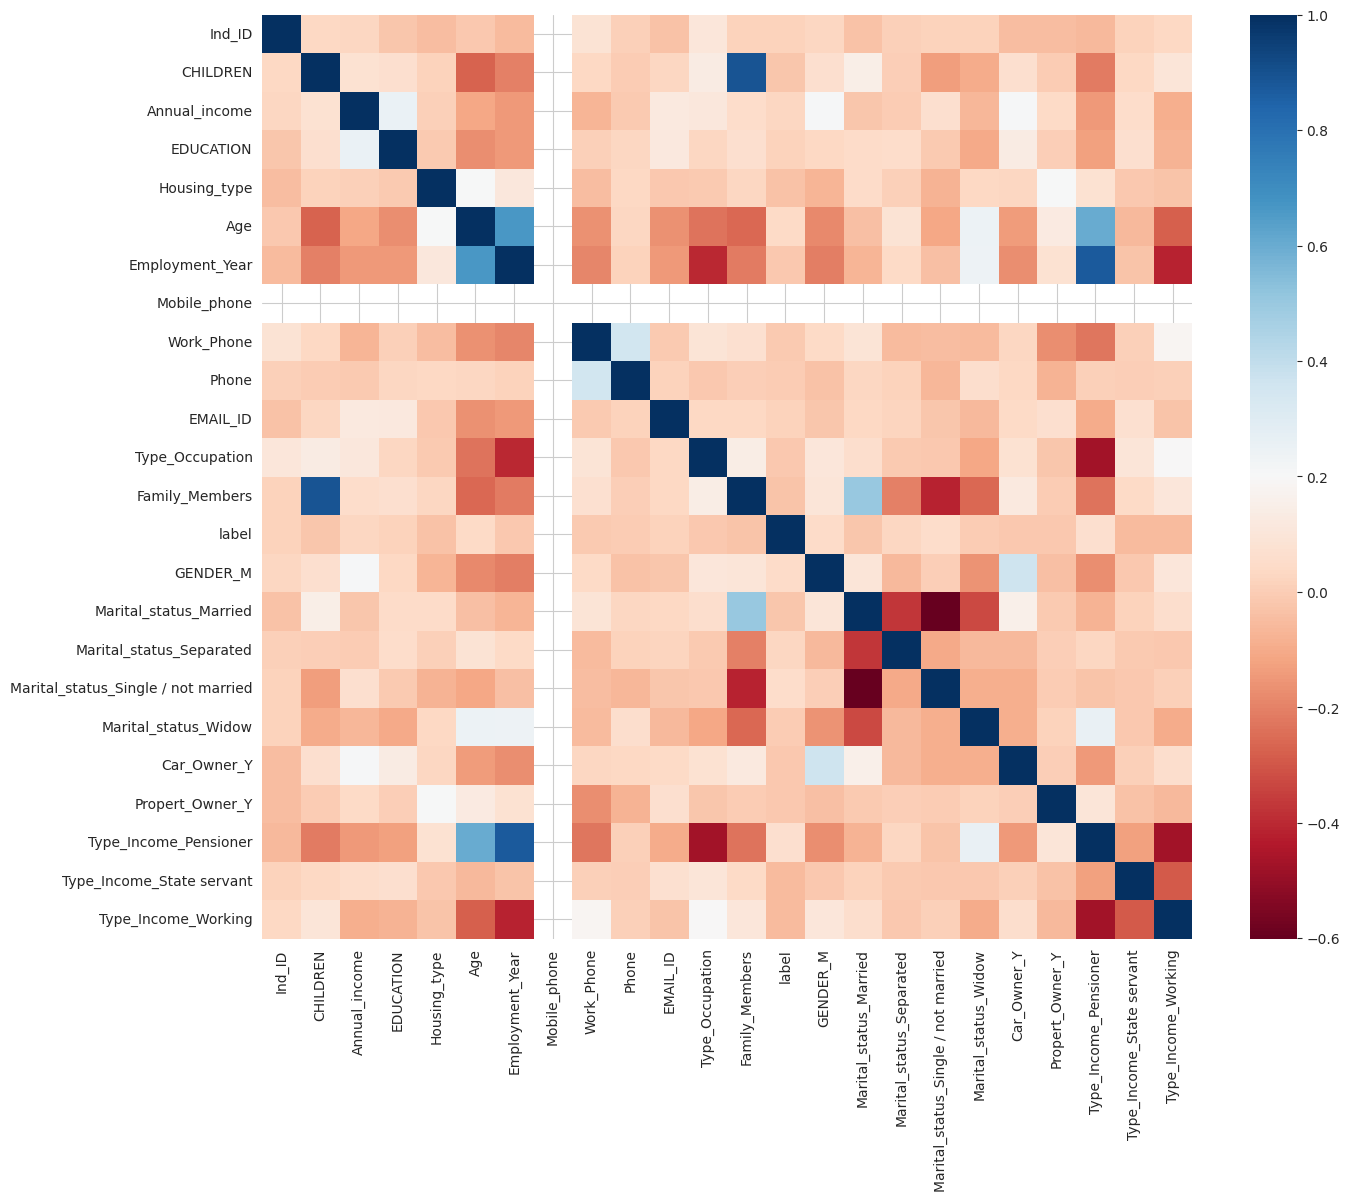

In [805]:
# Correlation between each rows.

plt.figure(figsize=(15,12))
sns.heatmap(df4.corr(), annot=False, cmap = "RdBu")

### **Split the data**

In [819]:
X = df4.drop(columns = ['label', 'Ind_ID'], axis = 1)
y = df4['label']

### **Feature Selection with Extra Tree Classifier -  Selecting Most important Features**

The ExtraTrees classifier, short for Extremely Randomized Trees, works similarly to Random Forests but with a couple of key differences:

1. **Randomization of Split Points**: In ExtraTrees, split points for each feature are selected randomly rather than based on the best split points, as in Random Forests. This randomness helps to further decorrelate the individual trees in the ensemble, reducing variance and potentially improving generalization.

2. **Aggregation of Predictions**: Like Random Forests, ExtraTrees aggregates predictions from multiple decision trees to make the final prediction. Each tree gets a vote, and the majority vote (for classification) or the average (for regression) determines the final prediction.

In summary, ExtraTrees aims to increase the randomness in the construction of individual trees, which can lead to a more diverse ensemble and potentially better performance, especially when dealing with noisy or high-dimensional data.

In [820]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

model.fit(X, y)

ExtraTreesClassifier()

In [821]:
df4.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'EDUCATION', 'Housing_type',
       'Age', 'Employment_Year', 'Mobile_phone', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'label', 'GENDER_M',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working'],
      dtype='object')

In [822]:
cols=[ 'CHILDREN', 'Annual_income', 'EDUCATION', 'Housing_type',
       'Age', 'Employment_Year', 'Mobile_phone', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'GENDER_M',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working']

feature_imp = pd.Series(model.feature_importances_, index=cols)

feature_imp

CHILDREN                               0.037423
Annual_income                          0.169098
EDUCATION                              0.058757
Housing_type                           0.036791
Age                                    0.153178
Employment_Year                        0.103910
Mobile_phone                           0.000000
Work_Phone                             0.031436
Phone                                  0.035579
EMAIL_ID                               0.028148
Type_Occupation                        0.084508
Family_Members                         0.053477
GENDER_M                               0.031699
Marital_status_Married                 0.019272
Marital_status_Separated               0.011003
Marital_status_Single / not married    0.013569
Marital_status_Widow                   0.008710
Car_Owner_Y                            0.037895
Propert_Owner_Y                        0.040438
Type_Income_Pensioner                  0.013687
Type_Income_State servant              0

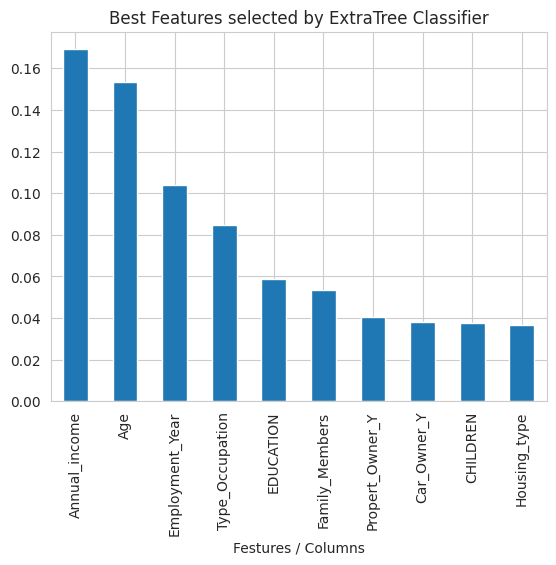

In [823]:
feature_imp.nlargest(10).plot(kind = 'bar')
plt.title("Best Features selected by ExtraTree Classifier")
plt.xlabel("Festures / Columns")
plt.show()

Here "Ind_ID" should not be used ideally, as its just an random uniue number assigned to every individual, but for current scenario , I have continued here for demonstration purpose, and have also tried removing that column for prediction, where prediction rate gets down by 1-1.7 %

### **Common Standardizarion before prediction**

In [825]:
X = df4.drop(columns = ['label', 'Ind_ID'], axis = 1)
y = df4['label']

In [826]:
# Extract the top 10 important features
top_features = feature_imp.nlargest(10)

In [827]:
# Selecting only the top important features from your original dataset
X_selected = X[top_features.index]

In [828]:
X_selected.head(4)

Annual_income  Age  Employment_Year  Type_Occupation  EDUCATION  \
0         180000   51             38.0              0.0          3   
1         315000   37              2.0              1.0          3   
2         315000   37              2.0              1.0          3   
3         315000   37              2.0              1.0          3   

   Family_Members  Propert_Owner_Y  Car_Owner_Y  CHILDREN  Housing_type  
0               2             True         True         0             5  
1               2            False         True         0             5  
2               2            False         True         0             5  
3               2            False         True         0             5

In [829]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(X_selected))

In [830]:
x.head(3)

0         1         2         3     4         5    6    7    8    9
0  0.094891  0.638298  1.000000  0.000000  0.75  0.071429  1.0  1.0  0.0  1.0
1  0.182482  0.340426  0.052632  0.052632  0.75  0.071429  0.0  1.0  0.0  1.0
2  0.182482  0.340426  0.052632  0.052632  0.75  0.071429  0.0  1.0  0.0  1.0

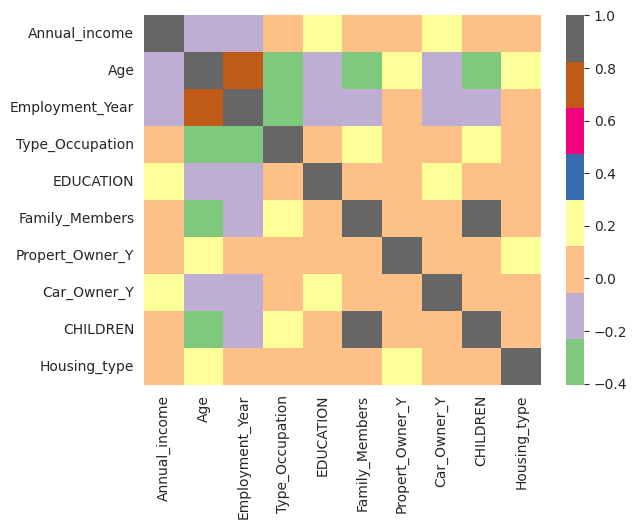

In [831]:
# Correlation between top selected features by ExtraTree Classifier
sns.heatmap(X_selected.corr(), cmap='Accent')
plt.show()

In [832]:
X_selected.shape

(1548, 10)

#

-----

## <font color="red">**H. Machine Learning - Models**</font> 


### **1. RandomForest Classifier (Best Fit Model)**

In [834]:
X = df4.drop(columns = ['label', 'Ind_ID'], axis = 1)
y = df4['label']

# Extract the top 10 important features
top_features = feature_imp.nlargest(10)

# Selecting only the top important features from original dataset
X_selected = X[top_features.index]

# Performing Standardization 
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(X_selected))

In [835]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [836]:
x_train.shape

(1238, 10)

In [837]:
x_test.shape

(310, 10)

In [838]:
y_train.shape

(1238,)

In [839]:
y_test.shape

(310,)

In [840]:
x_train.head()

0         1         2         3     4         5    6    7  \
680   0.109489  0.787234  1.000000  0.000000  0.25  0.000000  1.0  0.0   
1079  0.080292  0.361702  0.105263  0.210526  0.25  0.142857  0.0  1.0   
1190  0.240876  0.531915  0.026316  0.210526  0.25  0.142857  1.0  1.0   
864   0.094891  0.744681  1.000000  0.000000  0.25  0.000000  1.0  0.0   
743   0.065693  0.255319  0.052632  0.210526  0.25  0.071429  0.0  0.0   

             8    9  
680   0.000000  1.0  
1079  0.142857  0.0  
1190  0.071429  1.0  
864   0.000000  1.0  
743   0.000000  1.0

In [841]:
# Initializing and training your machine learning model (Random Forest Classifier used as an example)
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [842]:
y_pred = rdf.predict(x_test)

In [843]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [844]:
print(list(y_test[10:20]), end = " ")

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0] 

In [845]:
print("Accuracy Score = ",accuracy_score(y_test, y_pred))

rdf_conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy Score =  0.9387096774193548


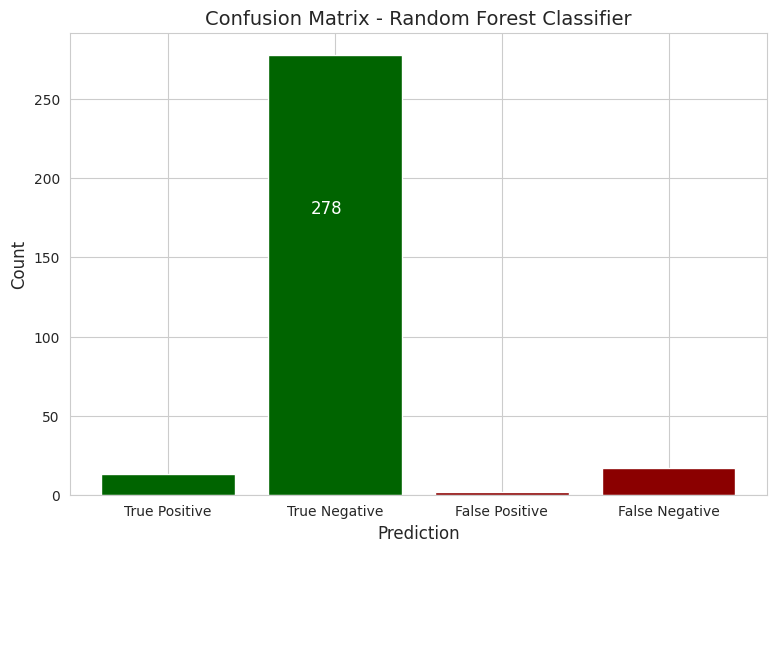

In [846]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = rdf_conf_matrix[1, 1]
TN = rdf_conf_matrix[0, 0]
FP = rdf_conf_matrix[0, 1]
FN = rdf_conf_matrix[1, 0]

# Plotting the confusion matrix using bar plots
plt.figure(figsize=(9, 6))
bars = plt.bar(x=['True Positive', 'True Negative', 'False Positive', 'False Negative'], height=[TP, TN, FP, FN], color=['darkgreen', 'darkgreen', 'darkred', 'darkred'])

# Adding text labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() - 100, f'{int(bar.get_height())}', ha='center', color='white', fontsize=12)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=14)
plt.show()


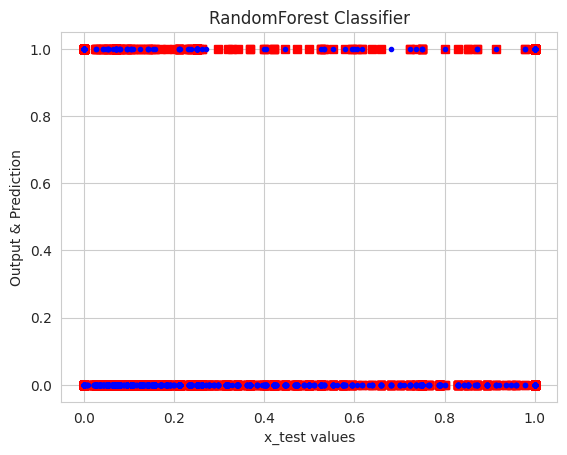

In [847]:
plt.plot(x_test, y_test, "s", color = "red")
plt.plot(x_test, y_pred, ".", color = "blue")
plt.title("RandomForest Classifier")
plt.ylabel("Output & Prediction")
plt.xlabel("x_test values")
plt.show()

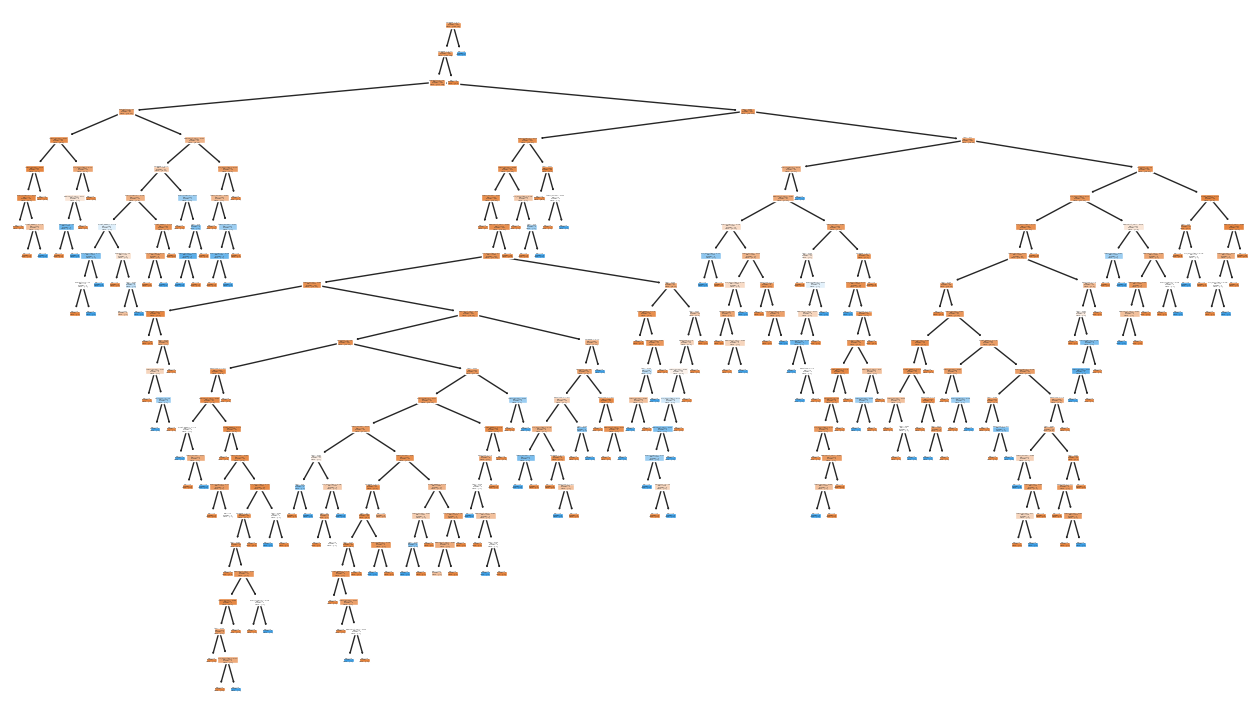

In [848]:
from sklearn import tree

# Extracting individual trees from the random forest
estimator = rdf.estimators_[0]

# Visualizing the first tree
plt.figure(figsize=(16, 9))
tree.plot_tree(estimator, filled=True, feature_names=X_selected.columns)
plt.show()


The above visualizes the tree model, showing the hierarchical structure of decisions made by the classifier based on the features in the dataset. Each node represents a decision based on a feature, and the branches represent the possible outcomes of that decision.

#### **RandomForest Classifier - Cross Validation**

In [849]:
from sklearn.model_selection import cross_val_score
cross_val_randomforest = cross_val_score(rdf, X_selected, y, scoring='accuracy', cv = 5) 

In [850]:
cross_val_randomforest

array([0.88709677, 0.88064516, 0.88709677, 0.87702265, 0.87702265])

### **2. XGBoost**

In [851]:
X = df4.drop(columns = ['label', 'Ind_ID'], axis = 1)
y = df4['label']

# Extract the top 10 important features
top_features = feature_imp.nlargest(10)

# Selecting only the top important features from your original dataset
X_selected = X[top_features.index]

from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(X_selected))

In [852]:
x.head(2)

0         1         2         3     4         5    6    7    8    9
0  0.094891  0.638298  1.000000  0.000000  0.75  0.071429  1.0  1.0  0.0  1.0
1  0.182482  0.340426  0.052632  0.052632  0.75  0.071429  0.0  1.0  0.0  1.0

In [853]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [854]:
x.head(2)

0         1         2         3     4         5    6    7    8    9
0  0.094891  0.638298  1.000000  0.000000  0.75  0.071429  1.0  1.0  0.0  1.0
1  0.182482  0.340426  0.052632  0.052632  0.75  0.071429  0.0  1.0  0.0  1.0

In [855]:
x_train.head()

0         1         2         3     4         5    6    7  \
680   0.109489  0.787234  1.000000  0.000000  0.25  0.000000  1.0  0.0   
1079  0.080292  0.361702  0.105263  0.210526  0.25  0.142857  0.0  1.0   
1190  0.240876  0.531915  0.026316  0.210526  0.25  0.142857  1.0  1.0   
864   0.094891  0.744681  1.000000  0.000000  0.25  0.000000  1.0  0.0   
743   0.065693  0.255319  0.052632  0.210526  0.25  0.071429  0.0  0.0   

             8    9  
680   0.000000  1.0  
1079  0.142857  0.0  
1190  0.071429  1.0  
864   0.000000  1.0  
743   0.000000  1.0

In [856]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [857]:
y_pred = xgb.predict(x_test)

In [858]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [859]:
print(list(y_test[10:20]), end = " ")

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0] 

In [860]:
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Confusion Matrix = 
 [[277   3]
 [ 17  13]]


In [861]:
print("Accuracy Score = ",accuracy_score(y_test, y_pred))

xgb_conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy Score =  0.9354838709677419


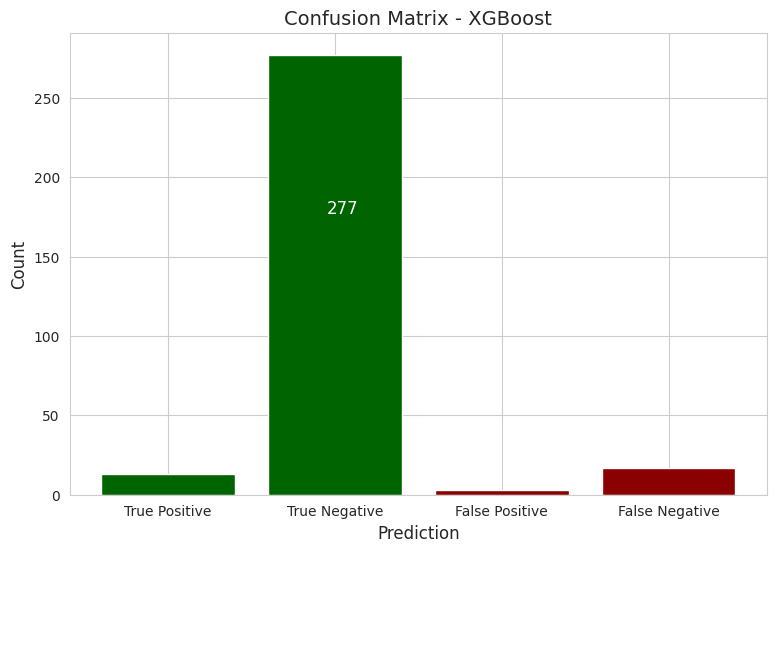

In [862]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = xgb_conf_matrix[1, 1]
TN = xgb_conf_matrix[0, 0]
FP = xgb_conf_matrix[0, 1]
FN = xgb_conf_matrix[1, 0]

# Plotting the confusion matrix using bar plots
plt.figure(figsize=(9, 6))
bars = plt.bar(x=['True Positive', 'True Negative', 'False Positive', 'False Negative'], height=[TP, TN, FP, FN], color=['darkgreen', 'darkgreen', 'darkred', 'darkred'])

# Adding text labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() - 100, f'{int(bar.get_height())}', color='white', fontsize=12)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Confusion Matrix - XGBoost', fontsize=14)
plt.show()


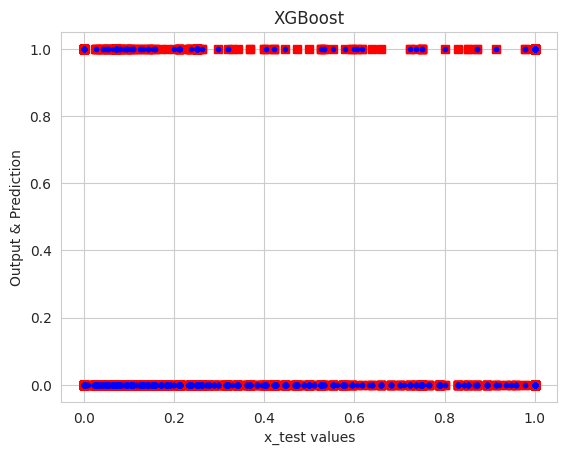

In [863]:
plt.plot(x_test, y_test, "s", color = "red")
plt.plot(x_test, y_pred, ".", color = "blue")
plt.title("XGBoost")
plt.ylabel("Output & Prediction")
plt.xlabel("x_test values")
plt.show()

#### **XGBoost Cross-Validation**

In [864]:
from sklearn.model_selection import cross_val_score
cross_val_xgb = cross_val_score(xgb, x, y, scoring='accuracy', cv = 5) 

In [865]:
cross_val_xgb

array([0.89032258, 0.86774194, 0.86774194, 0.86407767, 0.86407767])

### **3. Logistic Regression**

In [866]:
X = df4.drop(columns = ['label', 'Ind_ID'], axis = 1)
y = df4['label']

# Extract the top 10 important features
top_features = feature_imp.nlargest(10)

# Selecting only the top important features from your original dataset
X_selected = X[top_features.index]

from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(X_selected))

In [867]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [868]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(x_train, y_train)

LogisticRegression()

In [869]:
x_train.shape

(1238, 10)

In [870]:
y_train.shape

(1238,)

In [871]:
y_pred = log_r.predict(x_test)

In [872]:
y_pred[:12]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [873]:
print(list(y_test[:10]), end = " ")

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0] 

In [874]:
print("Accuracy Score = ",accuracy_score(y_test, y_pred))

logr_conf_matrix = confusion_matrix(y_test, y_pred)

print(logr_conf_matrix)

Accuracy Score =  0.9032258064516129
[[280   0]
 [ 30   0]]


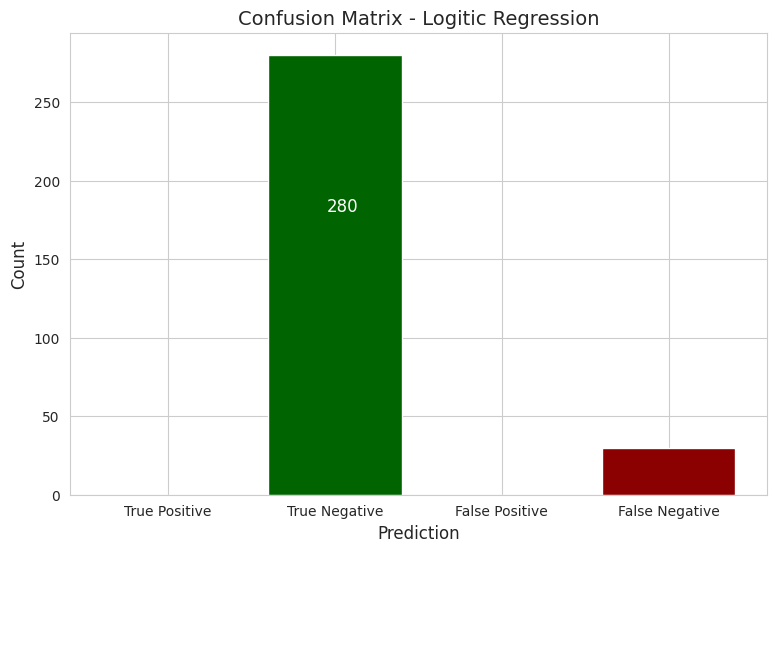

In [875]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = logr_conf_matrix[1, 1]
TN = logr_conf_matrix[0, 0]
FP = logr_conf_matrix[0, 1]
FN = logr_conf_matrix[1, 0]

# Plotting the confusion matrix using bar plots
plt.figure(figsize=(9, 6))
bars = plt.bar(x=['True Positive', 'True Negative', 'False Positive', 'False Negative'], height=[TP, TN, FP, FN], color=['darkgreen', 'darkgreen','darkred', 'darkred'])

# Adding text labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() - 100, f'{int(bar.get_height())}', color='white', fontsize=12)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Confusion Matrix - Logitic Regression', fontsize=14)
plt.show()


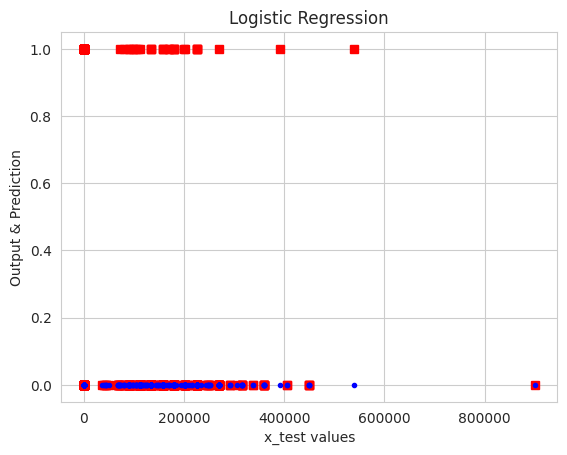

In [876]:
plt.plot(x_test, y_test, "s", color = "red")
plt.plot(x_test, y_pred, ".", color = "blue")
plt.title("Logistic Regression")
plt.ylabel("Output & Prediction")
plt.xlabel("x_test values")
plt.show()

#### **Logistic Regression**

In [877]:
from sklearn.model_selection import cross_val_score
cross_val_log_r = cross_val_score(log_r, X_selected, y, scoring='accuracy', cv = 5) 

In [878]:
cross_val_log_r

array([0.88709677, 0.88709677, 0.88709677, 0.88673139, 0.88673139])

### **4. Support vector Machines**

In [880]:
X = df4.drop(columns = ['label', 'Ind_ID'], axis = 1)
y = df4['label']

# Extract the top 10 important features
top_features = feature_imp.nlargest(10)

# Selecting only the top important features from your original dataset
X_selected = X[top_features.index]

from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(X_selected))

In [881]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [882]:
# Initializing and training your machine learning model (Random Forest Classifier used as an example)
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [883]:
y_pred = svc.predict(x_test)

In [884]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [885]:
print(list(y_test[10:20]), end = " ")

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0] 

In [886]:
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Confusion Matrix = 
 [[280   0]
 [ 30   0]]


In [887]:
print("Accuracy Score = ",accuracy_score(y_test, y_pred))

svm_conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix : \n",svm_conf_matrix)

Accuracy Score =  0.9032258064516129
Confusion Matrix : 
 [[280   0]
 [ 30   0]]


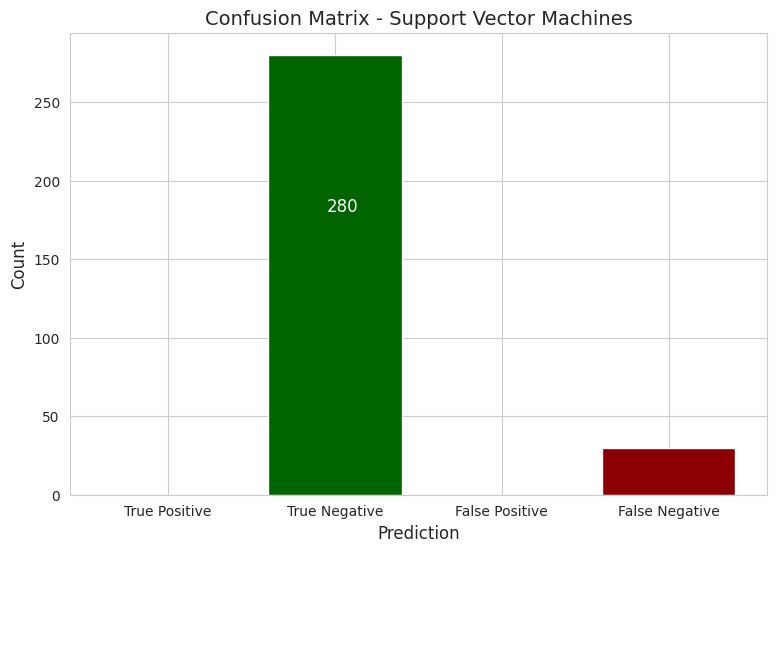

In [888]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = svm_conf_matrix[1, 1]
TN = svm_conf_matrix[0, 0]
FP = svm_conf_matrix[0, 1]
FN = svm_conf_matrix[1, 0]

# Plotting the confusion matrix using bar plots
plt.figure(figsize=(9, 6))
bars = plt.bar(x=['True Positive', 'True Negative', 'False Positive', 'False Negative'], height=[TP, TN, FP, FN], color=['darkgreen', 'darkgreen', 'darkred', 'darkred'])

# Adding text labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() - 100, f'{int(bar.get_height())}', color='white', fontsize=12)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Confusion Matrix - Support Vector Machines', fontsize=14)
plt.show()


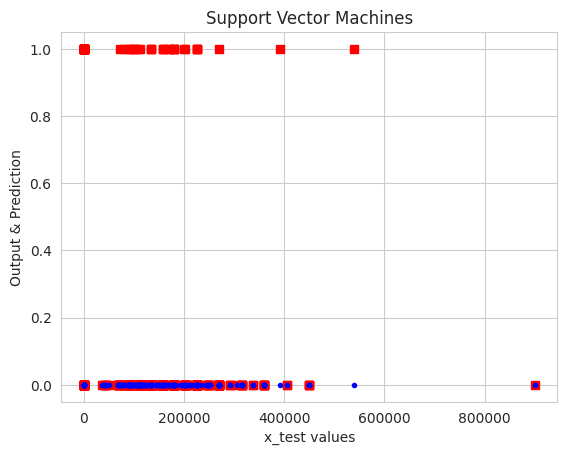

In [889]:
plt.plot(x_test, y_test, "s", color = "red")
plt.plot(x_test, y_pred, ".", color = "blue")
plt.title("Support Vector Machines")
plt.ylabel("Output & Prediction")
plt.xlabel("x_test values")
plt.show()

### **5. Decision Tree Classifier**

In [891]:
X = df4.drop(columns = ['label', 'Ind_ID'], axis = 1)
y = df4['label']

# Extract the top 10 important features
top_features = feature_imp.nlargest(10)

# Selecting only the top important features from your original dataset
X_selected = X[top_features.index]

from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(X_selected))

In [892]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [893]:
# Initializing and training your machine learning model (Random Forest Classifier used as an example)
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)

DecisionTreeClassifier()

In [894]:
y_pred = dct.predict(x_test)

In [895]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [896]:
print(list(y_test[10:20]), end = " ")

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0] 

[Text(0.407421875, 0.9772727272727273, 'Employment_Year <= 3.5\ngini = 0.207\nsamples = 1238\nvalue = [1093, 145]'),
 Text(0.23235887096774194, 0.9318181818181818, 'Annual_income <= 389250.0\ngini = 0.293\nsamples = 336\nvalue = [276, 60]'),
 Text(0.13568548387096774, 0.8863636363636364, 'Age <= 36.5\ngini = 0.253\nsamples = 310\nvalue = [264, 46]'),
 Text(0.04838709677419355, 0.8409090909090909, 'EDUCATION <= 1.5\ngini = 0.126\nsamples = 148\nvalue = [138, 10]'),
 Text(0.041935483870967745, 0.7954545454545454, 'Age <= 30.5\ngini = 0.206\nsamples = 86\nvalue = [76, 10]'),
 Text(0.01935483870967742, 0.75, 'Family_Members <= 1.5\ngini = 0.314\nsamples = 41\nvalue = [33, 8]'),
 Text(0.012903225806451613, 0.7045454545454546, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.025806451612903226, 0.7045454545454546, 'Type_Occupation <= 11.0\ngini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(0.01935483870967742, 0.6590909090909091, 'Car_Owner_Y <= 0.5\ngini = 0.375\nsamples = 24\nvalue 

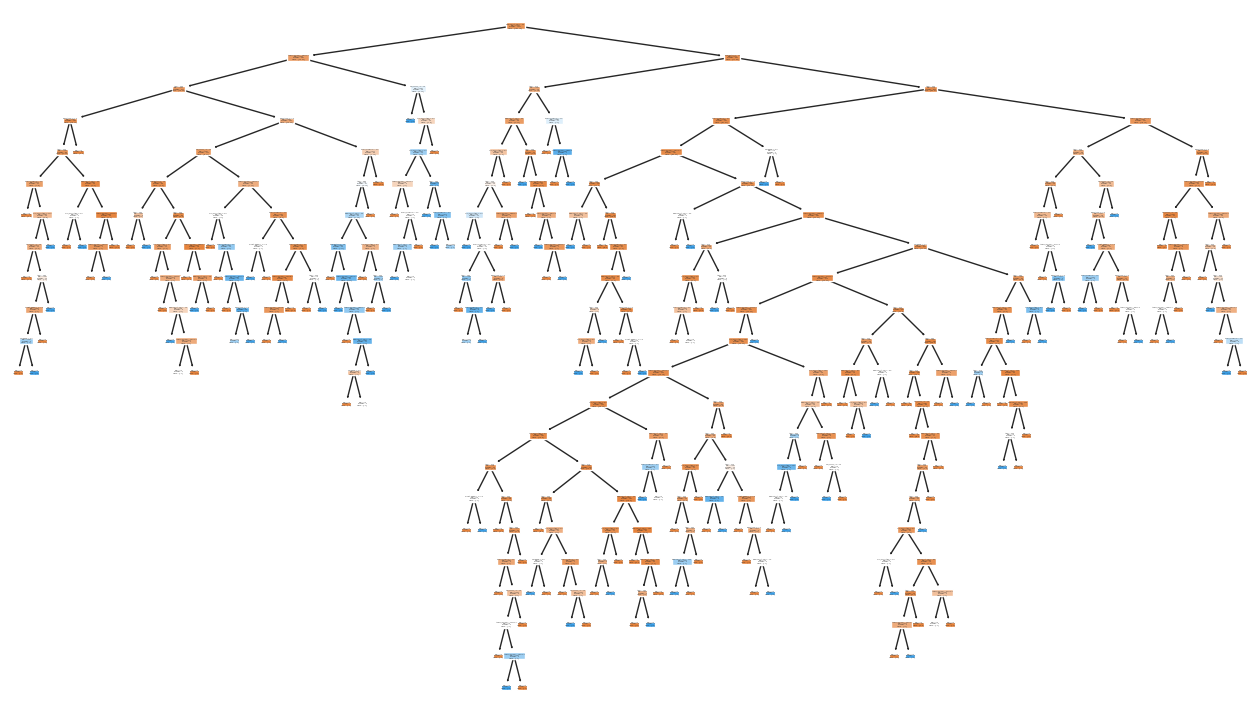

In [897]:
from sklearn import tree

reg = DecisionTreeClassifier(random_state=42)
reg.fit(x_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=X_selected.columns)

The above visualizes the tree model, showing the hierarchical structure of decisions made by the classifier based on the features in the dataset. Each node represents a decision based on a feature, and the branches represent the possible outcomes of that decision.

In [898]:
dt_Accuracy_Score = accuracy_score(y_test, y_pred)

print(dt_Accuracy_Score)

dt_conf_matrix = confusion_matrix(y_test, y_pred)

print(dt_conf_matrix)

0.8870967741935484
[[259  21]
 [ 14  16]]


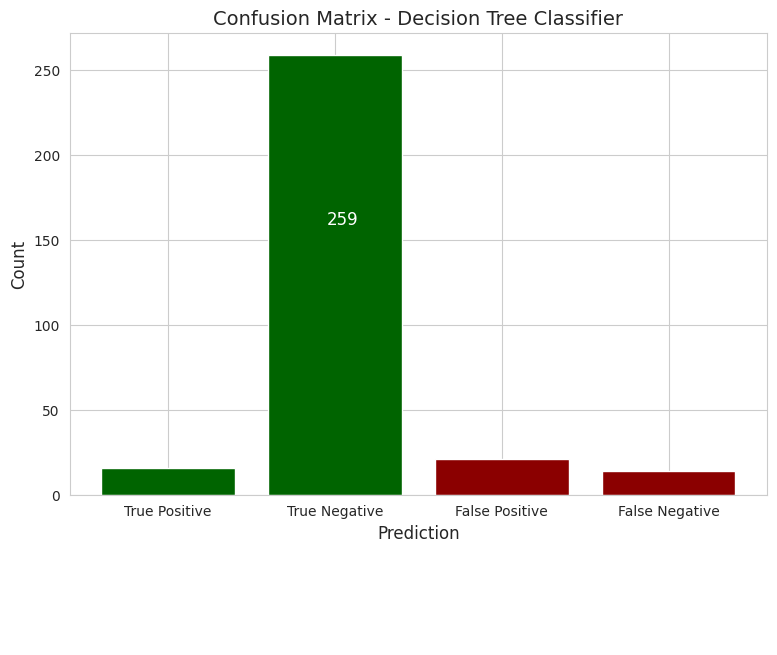

In [899]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = dt_conf_matrix[1, 1]
TN = dt_conf_matrix[0, 0]
FP = dt_conf_matrix[0, 1]
FN = dt_conf_matrix[1, 0]

# Plotting the confusion matrix using bar plots
plt.figure(figsize=(9, 6))
bars = plt.bar(x=['True Positive', 'True Negative', 'False Positive', 'False Negative'], height=[TP, TN, FP, FN], color=['darkgreen', 'darkgreen', 'darkred', 'darkred'])

# Adding text labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() - 100, f'{int(bar.get_height())}', color='white', fontsize=12)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Confusion Matrix - Decision Tree Classifier', fontsize=14)
plt.show()


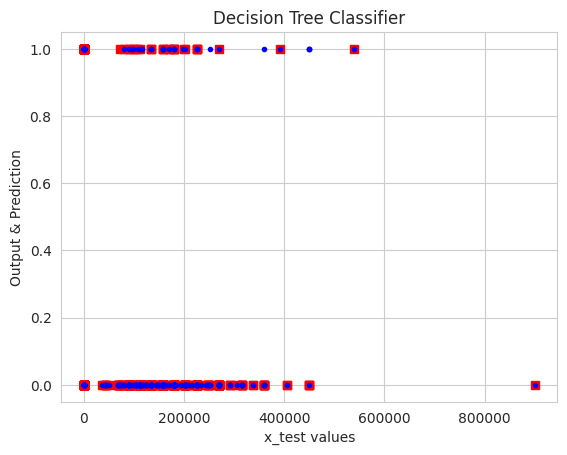

In [900]:
plt.plot(x_test, y_test, "s", color = "red")
plt.plot(x_test, y_pred, ".", color = "blue")
plt.title("Decision Tree Classifier")
plt.ylabel("Output & Prediction")
plt.xlabel("x_test values")
plt.show()

#### **DEcision Tree Cross-Validation**

In [901]:
from sklearn.model_selection import cross_val_score
cross_val_decisiontree = cross_val_score(dct, X_selected, y, scoring='accuracy', cv = 5) 

In [902]:
cross_val_decisiontree

array([0.80645161, 0.82580645, 0.82258065, 0.83495146, 0.82524272])

## <font color="red">**I. Model Accuracy Comparison**</font> 


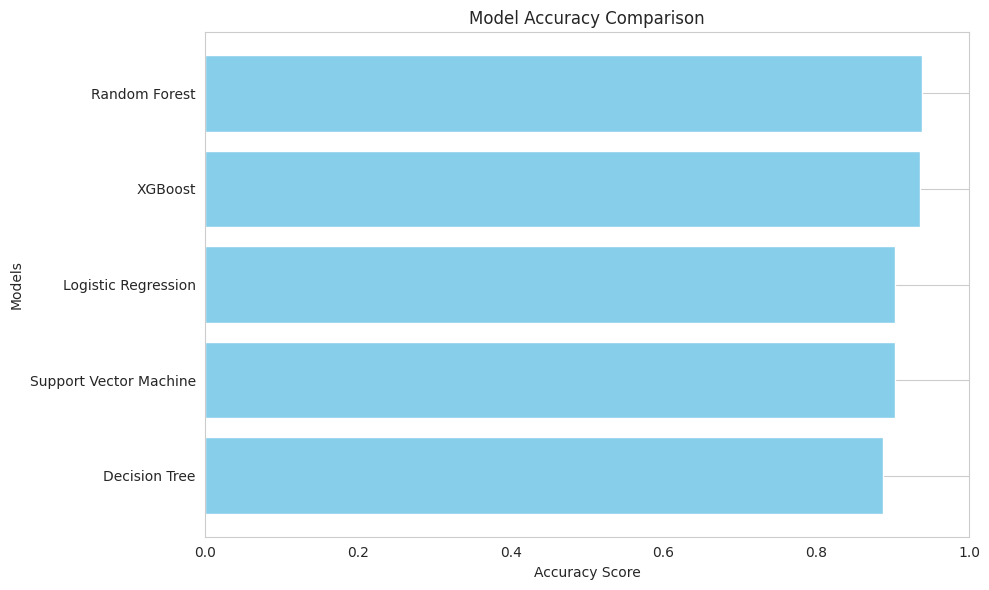

In [903]:
# Model accuracy data
Model_accuracy = {
    "Decision Tree": {"Accuracy_score": 0.8870967741935484},
    "Support Vector Machine": {"Accuracy_score": 0.9032258064516129},
    "Logistic Regression": {"Accuracy_score": 0.9032258064516129},
    "XGBoost": {"Accuracy_score": 0.9354838709677419},
    "Random Forest": {"Accuracy_score": 0.9387096774193548}
}

# Create DataFrame
Model_Accuracy = pd.DataFrame(Model_accuracy)

# Transpose DataFrame
Model_Accuracy = Model_Accuracy.transpose()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(Model_Accuracy.index, Model_Accuracy['Accuracy_score'], color='skyblue')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')

plt.xlim(0, 1)  # Set the x-axis limit to ensure accuracy scores are visible
plt.grid(axis='x')  # Add gridlines for better readability
plt.tight_layout()
plt.show()


-----

## <font color="red">**J. SQL**</font> 

- I have solved SQL Question in MySQL Workbench as well, I've saved file in the .zip file
- Use MySQL or PyMySQL to perform the below queries. 

- Note: Use only the cleaned data for SQL part of the project

In [904]:
import duckdb
conn=duckdb.connect()
conn.register('df',dv)
conn.execute("select * from df ").fetchdf()

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_income  \
0     5008827      M         Y              Y         0         180000   
1     5009744      F         Y              N         0         315000   
2     5009746      F         Y              N         0         315000   
3     5009749      F         Y              N         0         315000   
4     5009752      F         Y              N         0         315000   
...       ...    ...       ...            ...       ...            ...   
1543  5028645      F         N              Y         0         135000   
1544  5023655      F         N              N         0         225000   
1545  5115992      M         Y              Y         2         180000   
1546  5118219      M         Y              N         0         270000   
1547  5053790      F         Y              Y         0         225000   

               Type_Income                      Education  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Age  Employment_Year  \
0                  Married  House / apartment   51             38.0   
1                  Married  House / apartment   37              2.0   
2                  Married  House / apartment   37              2.0   
3                  Married  House / apartment   37              2.0   
4                  Married  House / apartment   37              2.0   
...                    ...                ...  ...              ...   
1543               Married  House / apartment   33              6.0   
1544  Single / not married  House / apartment   28              3.0   
1545               Married  House / apartment   36              7.0   
1546        Civil marriage  House / apartment   42              2.0   
1547               Married  House / apartment   45              8.0   

      Mobile_phone  Work_Phone  Phone  Email_ID Type_Occupation  \
0                1           0      0         0       Pensioner   
1                1           1      1         0         Unknown   
2                1           1      1         0         Unknown   
3                1           1      1         0         Unknown   
4                1           1      1         0         Unknown   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0         Unknown   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

### **1. Group the customers based on their income type and find the average of their annual income.**

In [905]:
import duckdb
conn=duckdb.connect()
conn.register('df',dv)
conn.execute("SELECT Type_Income, ROUND(AVG(Annual_income),2) as Average_Annual_Income FROM dv GROUP BY Type_Income ORDER BY Average_Annual_Income DESC").fetchdf()

Type_Income  Average_Annual_Income
0  Commercial associate              233932.60
1         State servant              211422.41
2               Working              180905.73
3             Pensioner              155131.60

### **2. Find the female owners of cars and property.**

In [906]:
import duckdb
conn=duckdb.connect()
conn.register('df',dv)
conn.execute("SELECT Ind_ID,Gender, Car_Owner, Property_Owner FROM dv WHERE Gender = 'F' AND Car_Owner = 'Y' AND Property_Owner = 'Y'").fetchdf()

Ind_ID Gender Car_Owner Property_Owner
0    5018498      F         Y              Y
1    5018501      F         Y              Y
2    5018503      F         Y              Y
3    5024213      F         Y              Y
4    5036660      F         Y              Y
..       ...    ...       ...            ...
174  5048458      F         Y              Y
175  5023719      F         Y              Y
176  5033520      F         Y              Y
177  5024049      F         Y              Y
178  5053790      F         Y              Y

[179 rows x 4 columns]

### **3. Find the male customers who are staying with their families.**
- Here we have 2 approaches to the question: 
	- 1st :
		- There is an male living with his parents (could be an single parent or both)
	- 2nd 
		- He could be living with his wife and childrens which would make up his family have more than 2 members or he and his wife make family of atleast 2.

In [907]:
import duckdb
conn=duckdb.connect()
conn.register('df',dv)
conn.execute("SELECT Ind_ID, Gender, Children, Family_Members, Housing_Type FROM dv WHERE (Gender = 'M') AND (Family_Members >= 2 OR Housing_type = 'With parents')").fetchdf()

Ind_ID Gender  Children  Family_Members       Housing_type
0    5008827      M         0               2  House / apartment
1    5010864      M         1               3  House / apartment
2    5010868      M         1               3  House / apartment
3    5021303      M         1               3       With parents
4    5021310      M         0               2  House / apartment
..       ...    ...       ...             ...                ...
473  5150038      M         0               1       With parents
474  5145694      M         0               1       With parents
475  5068648      M         0               1       With parents
476  5094884      M         0               1       With parents
477  5028612      M         0               1       With parents

[478 rows x 5 columns]

### **4. Please list the top five people having the highest income.**

In [908]:
import duckdb
conn=duckdb.connect()
conn.register('df',dv)
conn.execute("SELECT * FROM dv ORDER BY Annual_Income DESC LIMIT 5 ").fetchdf()

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_income  \
0  5143231      F         Y              Y         1        1575000   
1  5143235      F         Y              Y         1        1575000   
2  5090470      M         N              Y         1         900000   
3  5079016      M         Y              Y         2         900000   
4  5079017      M         Y              Y         2         900000   

            Type_Income                      Education        Marital_status  \
0  Commercial associate               Higher education  Single / not married   
1  Commercial associate               Higher education  Single / not married   
2               Working  Secondary / secondary special               Married   
3  Commercial associate               Higher education               Married   
4  Commercial associate               Higher education               Married   

        Housing_type  Age  Employment_Year  Mobile_phone  Work_Phone  Phone  \
0  House / apartment   28              7.0             1           0      0   
1  House / apartment   28              7.0             1           0      0   
2  House / apartment   42             12.0             1           0      0   
3  House / apartment   27              3.0             1           0      0   
4  House / apartment   27              3.0             1           0      0   

   Email_ID Type_Occupation  Family_Members  label  
0         0        Managers               2      0  
1         0        Managers               2      0  
2         0        Laborers               3      0  
3         0        Managers               4      0  
4         0        Managers               4      0

### **5. How many married people are having bad credit?**
-  Here since we don't have enough information on Credit limit/score, credit history, pending bills, delayed payments history etc, we won't be able to find bad credits, hence I'm using label (which is approval for credit card 0=approved, 1=rejected), hence I'm using 1 (rejected) as bad credit in this context.


In [909]:
import duckdb
conn=duckdb.connect()
conn.register('df',dv)
conn.execute("SELECT * FROM dv WHERE (label = 1 AND Marital_Status = 'Married');").fetchdf()

Ind_ID Gender Car_Owner Property_Owner  Children  Annual_income  \
0    5008827      M         Y              Y         0         180000   
1    5009744      F         Y              N         0         315000   
2    5009746      F         Y              N         0         315000   
3    5009749      F         Y              N         0         315000   
4    5009752      F         Y              N         0         315000   
..       ...    ...       ...            ...       ...            ...   
109  5149190      M         Y              N         1         450000   
110  5149192      F         Y              N         1         450000   
111  5149828      M         Y              Y         0         315000   
112  5149834      F         N              Y         0         157500   
113  5149838      F         N              Y         0         157500   

              Type_Income                      Education Marital_status  \
0               Pensioner               Higher education        Married   
1    Commercial associate               Higher education        Married   
2    Commercial associate               Higher education        Married   
3    Commercial associate               Higher education        Married   
4    Commercial associate               Higher education        Married   
..                    ...                            ...            ...   
109               Working               Higher education        Married   
110               Working               Higher education        Married   
111               Working  Secondary / secondary special        Married   
112  Commercial associate               Higher education        Married   
113             Pensioner               Higher education        Married   

          Housing_type  Age  Employment_Year  Mobile_phone  Work_Phone  Phone  \
0    House / apartment   51             38.0             1           0      0   
1    House / apartment   37              2.0             1           1      1   
2    House / apartment   37              2.0             1           1      1   
3    House / apartment   37              2.0             1           1      1   
4    House / apartment   37              2.0             1           1      1   
..                 ...  ...              ...           ...         ...    ...   
109  House / apartment   27              1.0             1           0      1   
110  House / apartment   27              1.0             1           0      1   
111  House / apartment   48              7.0             1           0      0   
112  House / apartment   34              4.0             1           0      1   
113  House / apartment   34              4.0             1           0      1   

     Email_ID Type_Occupation  Family_Members  label  
0           0       Pensioner               2      1  
1           0         Unknown               2      1  
2           0         Unknown               2      1  
3           0         Unknown               2      1  
4           0         Unknown               2      1  
..        ...             ...             ...    ...  
109         1      Core staff               3      1  
110         1      Core staff               3      1  
111         0        Managers               2      1  
112         1  Medicine staff               2      1  
113         1  Medicine staff               2      1  

[114 rows x 19 columns]

### **6. What is the highest education level and what is the total count?**

In [910]:
import duckdb
conn=duckdb.connect()
conn.register('df',dv)
conn.execute("SELECT Education, COUNT(Education) as Count_Education FROM dv GROUP BY Education ORDER BY Count_Education DESC;").fetchdf()

Education  Count_Education
0  Secondary / secondary special             1031
1               Higher education              426
2              Incomplete higher               68
3                Lower secondary               21
4                Academic degree                2

### **7. Between married males and females, who is having more bad credit?**

In [911]:
import duckdb
conn=duckdb.connect()
conn.register('df',dv)
conn.execute("SELECT Gender, label, COUNT(label) as Number_of_bad_credits FROM dv WHERE label = 1 GROUP BY Gender, label ORDER BY Number_of_bad_credits DESC;").fetchdf()

Gender  label  Number_of_bad_credits
0      F      1                    100
1      M      1                     75

-----

# **END**

-----

-----